In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from sklearn.model_selection  import train_test_split 
from sklearn.preprocessing  import OrdinalEncoder, StandardScaler
import matplotlib.pyplot  as plt
import seaborn as sns 
from collections import Counter
 

In [19]:
import os

file_path = r'E:\Project\机器学习\莫愁师姐平台部署\250916\GMC1.csv'
df = pd.read_csv(file_path, encoding='gbk')  # 尝试使用 GBK 编码
print('数据维度:', df.shape)
# 数据文件路径
data_path = r'E:\Project\机器学习\莫愁师姐平台部署\250916\GMC1.csv'
save_dir = r"E:\Project\机器学习\莫愁师姐平台部署\250916\0921"
os.makedirs(save_dir, exist_ok=True)
# 加载数据
data = pd.read_csv(data_path, encoding='gbk')
 
# 划分特征和标签
X = data.iloc[:, :-1]  # 从第一列到倒数第二列提取特征
y = data.iloc[:, -1]   # 最后一列作为目标变量
# 确保所有特征名称都是字符串并移除特殊字符
df.columns = df.columns.astype(str).str.replace('[', '', regex=False).str.replace(']', '', regex=False).str.replace('<', '', regex=False)

# 打印前几行数据
print("数据前几行: \n", df.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2048)

数据维度: (39, 7)
数据前几行: 
    Volume of KH550 (mL)  Temperature (℃)  Reaction time (h)  \
0                   0.1               90                 12   
1                   0.5               90                 12   
2                   1.0               90                 12   
3                   1.5               90                 12   
4                   2.0               90                 12   

   Protein incubation time (h)  Imidazole concentration (mM)  \
0                          2.0                           500   
1                          2.0                           500   
2                          2.0                           500   
3                          2.0                           500   
4                          2.0                           500   

   Volume of imidazole (μL)  Qe (mg/g)   
0                       600        9.42  
1                       600       15.70  
2                       600       15.70  
3                       600       25.12  
4  

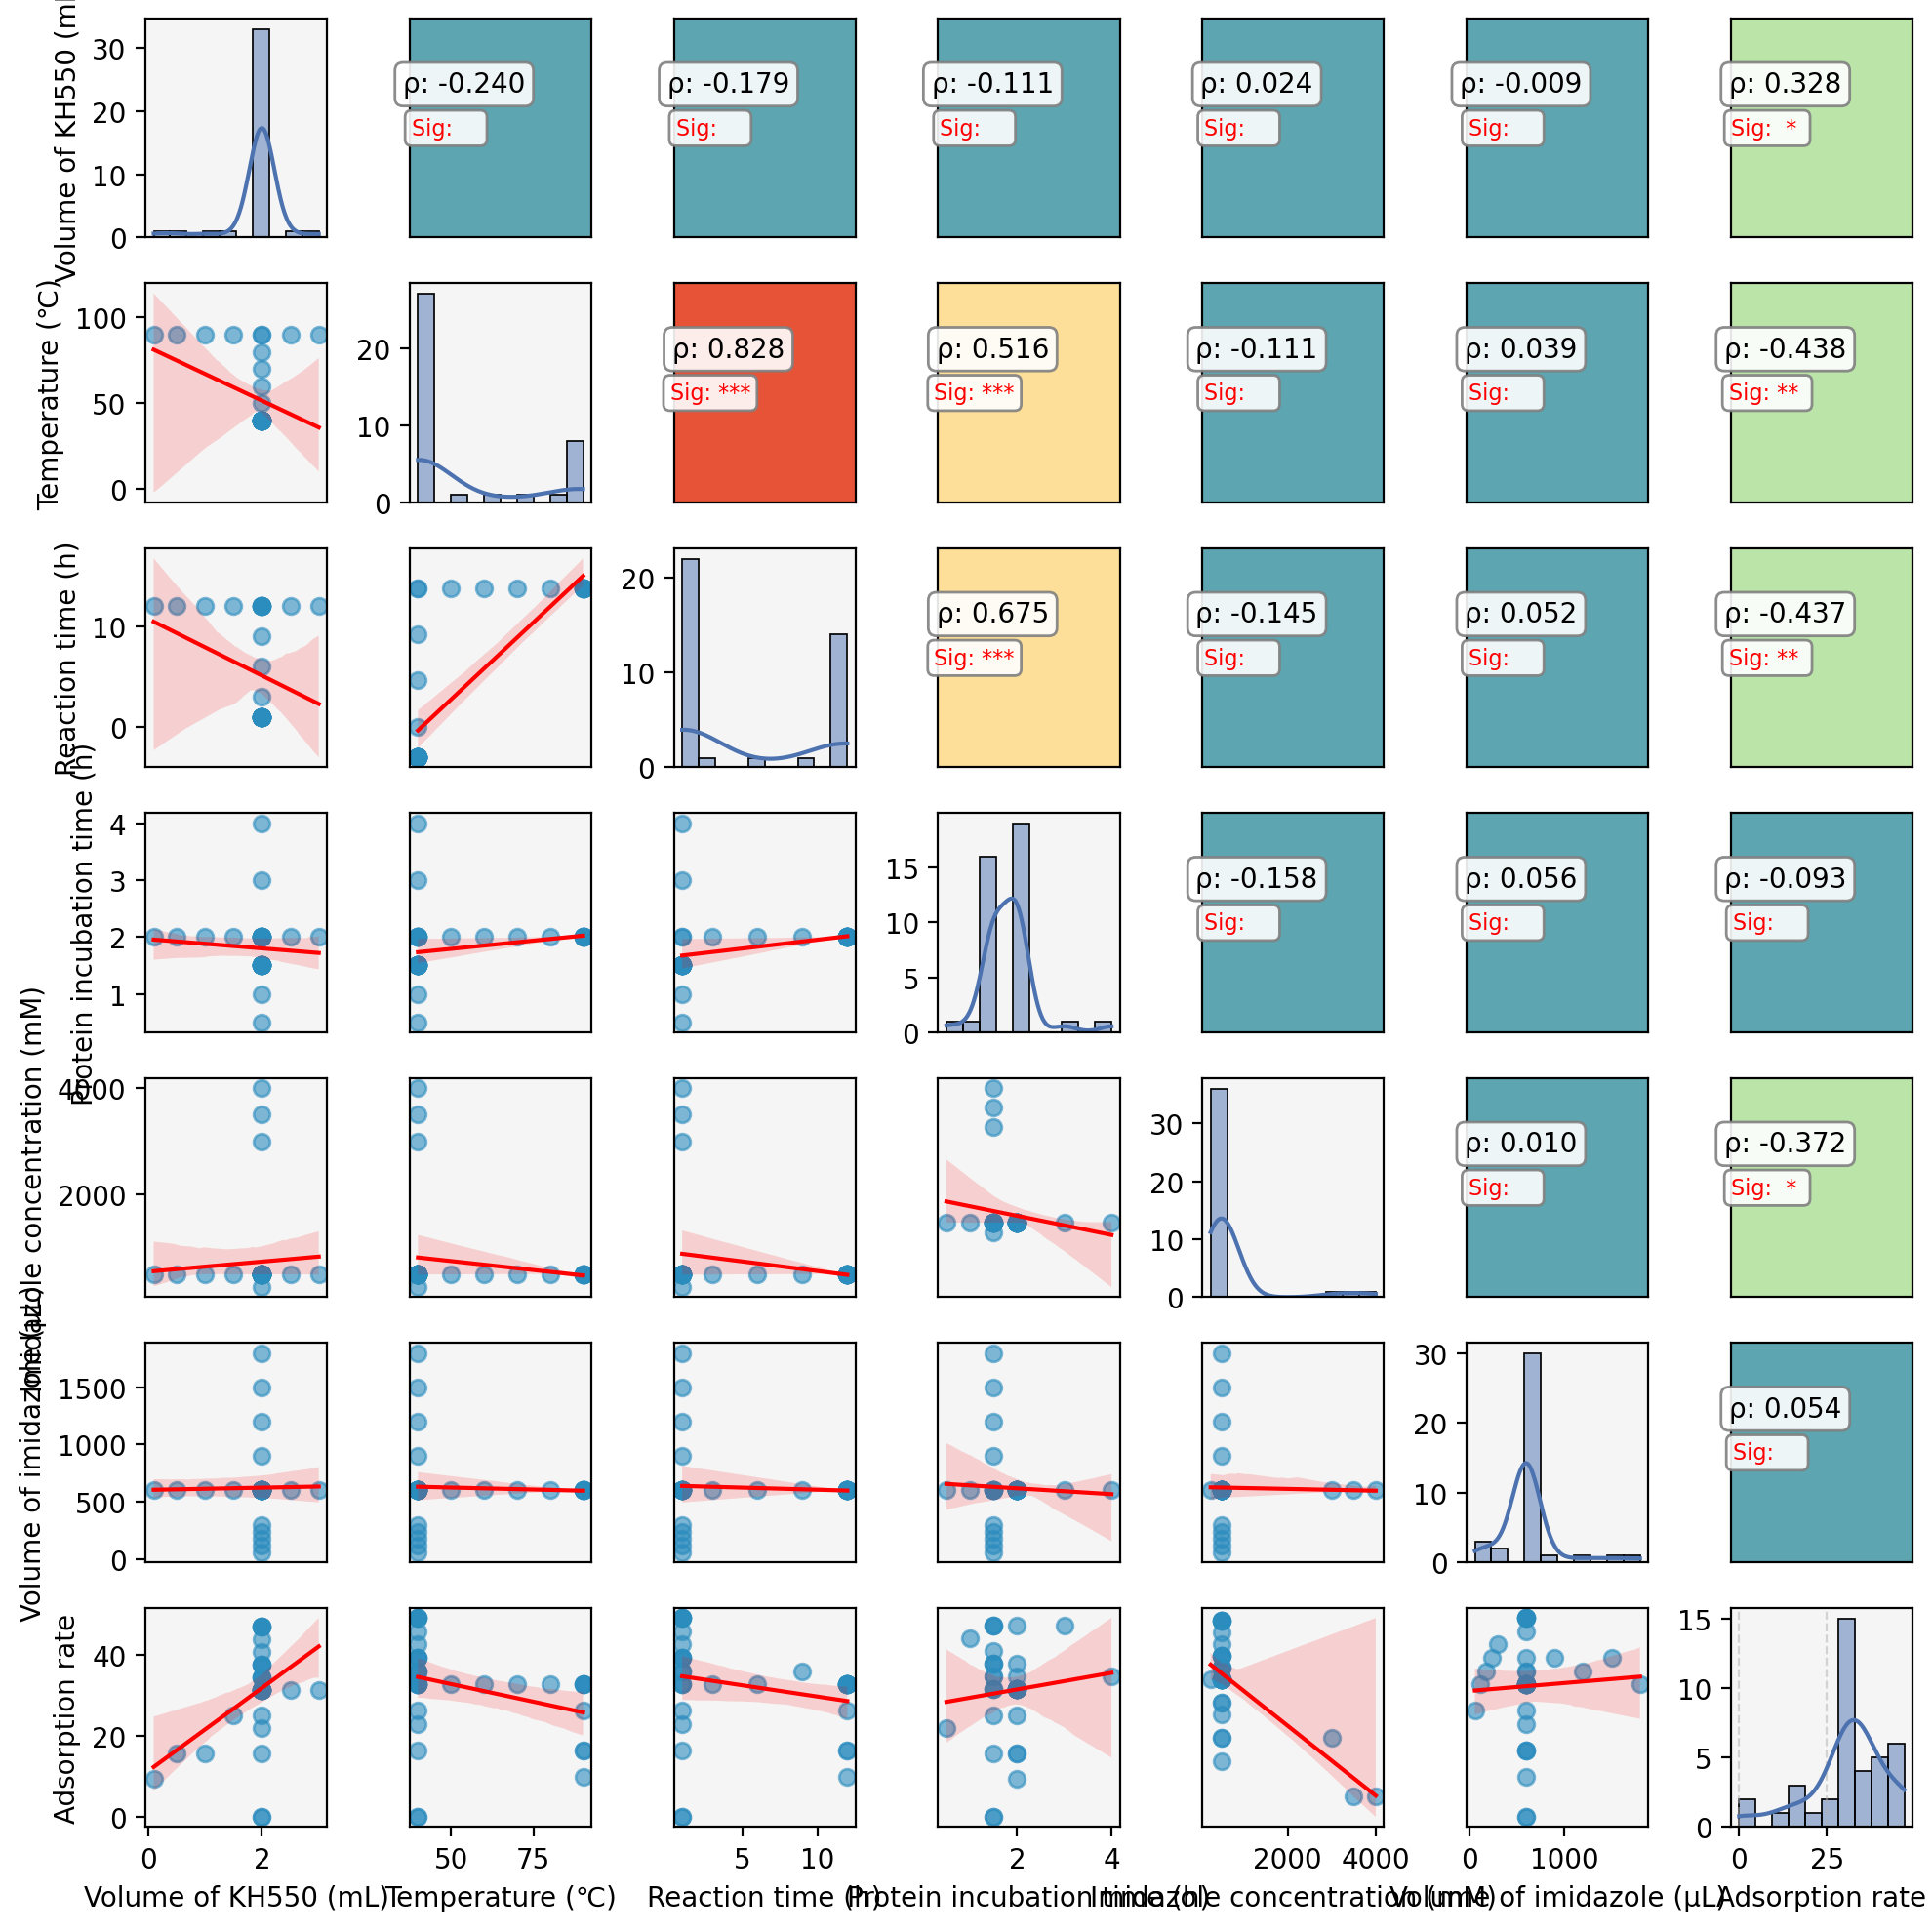

In [20]:

import Pairs3
X_modify_3=X.copy()
X_modify_3['Adsorption rate'] = y
p2=Pairs3.Pairs(pdata= X_modify_3,figsize=(10,10),dpi=200)
fig, ax = p2.pairs()
fig.savefig('plot1.png')

In [21]:
from sklearn.ensemble  import ExtraTreesRegressor, AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor 
from sklearn.linear_model  import LinearRegression, Lasso, Ridge
from sklearn.neighbors  import KNeighborsRegressor
from sklearn.linear_model  import Lasso 
from sklearn.naive_bayes  import GaussianNB 
from sklearn.model_selection  import GridSearchCV, KFold
from sklearn.svm  import SVR
import joblib
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network  import MLPRegressor 
import numpy as np
import joblib

import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

# 定义模型（新增 KNN 和 SVR）
from sklearn.ensemble  import (
    RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, 
    ExtraTreesRegressor 
)
from sklearn.neighbors  import KNeighborsRegressor
from sklearn.linear_model  import LinearRegression, BayesianRidge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor 
from catboost import CatBoostRegressor
from sklearn.svm  import SVR
from sklearn.neural_network  import MLPRegressor
from sklearn.model_selection  import GridSearchCV, TimeSeriesSplit 
import numpy as np
from sklearn.tree  import DecisionTreeRegressor 
 
# 替换GNB为贝叶斯岭回归（适合连续值预测）
models = {
    'RF': RandomForestRegressor(),
    'AdaB': AdaBoostRegressor(),
    'GrB': GradientBoostingRegressor(),
    'ET': ExtraTreesRegressor(),
    'KNN': KNeighborsRegressor(),
    'Lg': LinearRegression(),
    'XGB': XGBRegressor(),
    'CB': CatBoostRegressor(silent=True),  # 关闭冗余输出
    'SVR': SVR(),
    'BR': BayesianRidge()  # 替换GNB
}



## 训练模型

In [22]:
 
# 优化后的超参数网格 (回归专用)
from sklearn.tree  import DecisionTreeClassifier 

from sklearn.tree  import DecisionTreeRegressor
from sklearn.ensemble  import AdaBoostRegressor
import numpy as np 
from sklearn.tree  import DecisionTreeRegressor
from sklearn.ensemble  import AdaBoostRegressor
import numpy as np

param_grids_1 = {
    'RF': {
        'n_estimators': [100,120],
        'max_features': ['sqrt', 'log2', 0.5],
        'max_depth': [20],
        'min_samples_split': [2,3],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True, False],
        'criterion': ['squared_error', 'absolute_error']
    },
    'AdaB': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.5],
        'loss': ['linear', 'square', 'exponential'],
        'estimator': [DecisionTreeRegressor(max_depth=3)]  # 修正为正确的参数名
    },
    'GrB': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'subsample': [0.8, 1.0],
        'loss': ['squared_error', 'absolute_error']
    },
    'ET': {
        'n_estimators': [50, 100],
        'max_features': ['sqrt', 'log2', 0.5],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True, False],
        'criterion': ['squared_error', 'absolute_error']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'Lg': {},
    'XGB': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'min_child_weight': [1, 3],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8],
        'gamma': [0, 0.1],
        'reg_alpha': [0, 0.1],
        'reg_lambda': [1],
        'objective': ['reg:squarederror']
    },
    'LGBM': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'num_leaves': [16, 31],
        'max_depth': [3, 5],
        'min_child_samples': [10, 20],
        'subsample': [0.7, 0.8],
        'colsample_bytree': [0.7, 0.8],
        'reg_alpha': [0, 0.1],
        'reg_lambda': [0, 0.1],
        'objective': ['regression']
    },
    'CB': {
        'iterations': [100, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [4, 6],
        'l2_leaf_reg': [1, 3],
        'loss_function': ['RMSE']
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto']
    },
    'BR': {
        'alpha_1': [1e-6, 1e-5],
        'alpha_2': [1e-6, 1e-5],
        'lambda_1': [1e-6, 1e-5],
        'lambda_2': [1e-6, 1e-5],
        'max_iter': [300, 500]
    }
}
param_grids = {
    'RF': {
        'n_estimators': [100, 200],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [None, 5, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'AdaB': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.2, 1.0],
        'loss': ['linear', 'square', 'exponential']
    },
    'GrB': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'ET': {
        'n_estimators': [10, 100],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [None, 5, 30],
        'min_samples_split': [2, 10],
        'min_samples_leaf': [1, 4]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'Lg': {},  # 线性回归无超参 
    'XGB': {
        'n_estimators': [100,200],
        'learning_rate': [0.1, 0.01],
        'max_depth': [3, 5],
        'min_child_weight': [1, 3],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8],
        'gamma': [0, 0.1],
        'reg_alpha': [0, 0.1],
        'reg_lambda': [1]
    },
    'CB': {
        'iterations': [100,200],
        'learning_rate': [0.03],
        'depth': [2, 4, 6],
        'l2_leaf_reg': [1, 3]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto']
    },
    'MLP': {
        'hidden_layer_sizes': [(50,), (50, 0)],  # 隐藏层大小
        'learning_rate_init': [0.001, 0.01],         # 学习率
        'alpha': [ 0.001, 0.01]                # 正则化参数
    },
    'BR': {  # 贝叶斯岭回归参数
        'alpha_1': [1e-6, 1e-5],
        'alpha_2': [1e-6, 1e-5],
        'lambda_1': [1e-6, 1e-5],
        'lambda_2': [1e-6, 1e-5],
        'max_iter': [300, 500]
    }
}

# 使用 KFold 代替 StratifiedKFold 
cv = KFold(n_splits=5, shuffle=True, random_state=42)
 
# 实例化 GridSearchCV（假设 X 和 y 已定义）
best_models = {}
for name, model in models.items(): 
    print(f"Training {name}...")
    grid_search = GridSearchCV(estimator=model,
                               param_grid=param_grids[name],
                               scoring='neg_mean_squared_error',
                               cv=cv,
                               n_jobs=-1,
                               verbose=0)
    grid_search.fit(X,  y)
    best_models[name] = grid_search.best_estimator_ 
    print(f"{name} best score: {-grid_search.best_score_:.4f}  (MSE)")

# 存储结果
results = []
# 存储优化后的模型 
optimized_models = {}

best_r2 = -np.inf  # Initialize best R² to be a very low value
best_model_name = ""
best_model = None

# 遍历模型，调参与评估
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # 网格搜索
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids_1[model_name], cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    # 最优模型和参数
    best_estimator = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best parameters for {model_name}: {best_params}")

    # 预测
    y_pred_test  = best_estimator.predict(X_test)
    y_pred_train = best_estimator.predict(X_train)

    # 计算 Root MAPE（避免除以 0）
    non_zero_idx = y_test != 0
    if np.any(non_zero_idx):
        mape = np.mean(np.abs((y_test[non_zero_idx] - y_pred_test[non_zero_idx]) / y_test[non_zero_idx])) * 100
        root_mape = np.sqrt(mape)  # 计算均方根 MAPE
    else:
        root_mape = np.nan

    # 计算其他指标
    r2 = r2_score(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    ev = explained_variance_score(y_test, y_pred_test)

    # 存储结果
    results.append({
        'Model': model_name,
        'R²': r2,
        'MAE': mae,
        'RMSE': rmse,
        'EV': ev
    })
    filename = os.path.join(save_dir, f"{model_name}_optimized.pkl")
    joblib.dump(best_estimator,  filename)  #========================================================================================
    optimized_models[model_name] = best_estimator 
    if r2 > best_r2:
        best_r2 = r2
        best_model_name = model_name
        best_model = best_estimator


# 转换为 DataFrame 展示
results_df = pd.DataFrame(results)

# 打印所有模型的评估结果
print(results_df)

results_df.to_csv(os.path.join(save_dir,  "results.csv") ,  index=False)

# 打印最优模型
print(f"Best Model based on R²: {best_model_name} with R² = {best_r2}")
joblib.dump(best_model,  os.path.join(save_dir, 'best_model.pkl') ) #============================================存盘  =====================================
print("\n优化后的堆叠模型已保存为 'best.pkl'") 
# 使用最佳模型计算 MAE
y_pred_best_model = best_model.predict(X_test)
best_mae = mean_absolute_error(y_test, y_pred_best_model)
print(f"Best Model MAE: {best_mae}")


Training RF...
RF best score: 47.8358  (MSE)
Training AdaB...
AdaB best score: 40.0579  (MSE)
Training GrB...
GrB best score: 44.7172  (MSE)
Training ET...
ET best score: 38.9473  (MSE)
Training KNN...
KNN best score: 53.6387  (MSE)
Training Lg...
Lg best score: 51.7891  (MSE)
Training XGB...
XGB best score: 99.2094  (MSE)
Training CB...
CB best score: 45.7665  (MSE)
Training SVR...
SVR best score: 57.5386  (MSE)
Training BR...
BR best score: 69.2962  (MSE)
Training RF...
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters for RF: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training AdaB...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for AdaB: {'estimator': DecisionTreeRegressor(max_depth=3), 'learning_rate': 0.1, 'loss': 'square', 'n_estimators': 50}
Training GrB...
Fitting 5 folds for each of 128 candidates, tota

## 加载模型

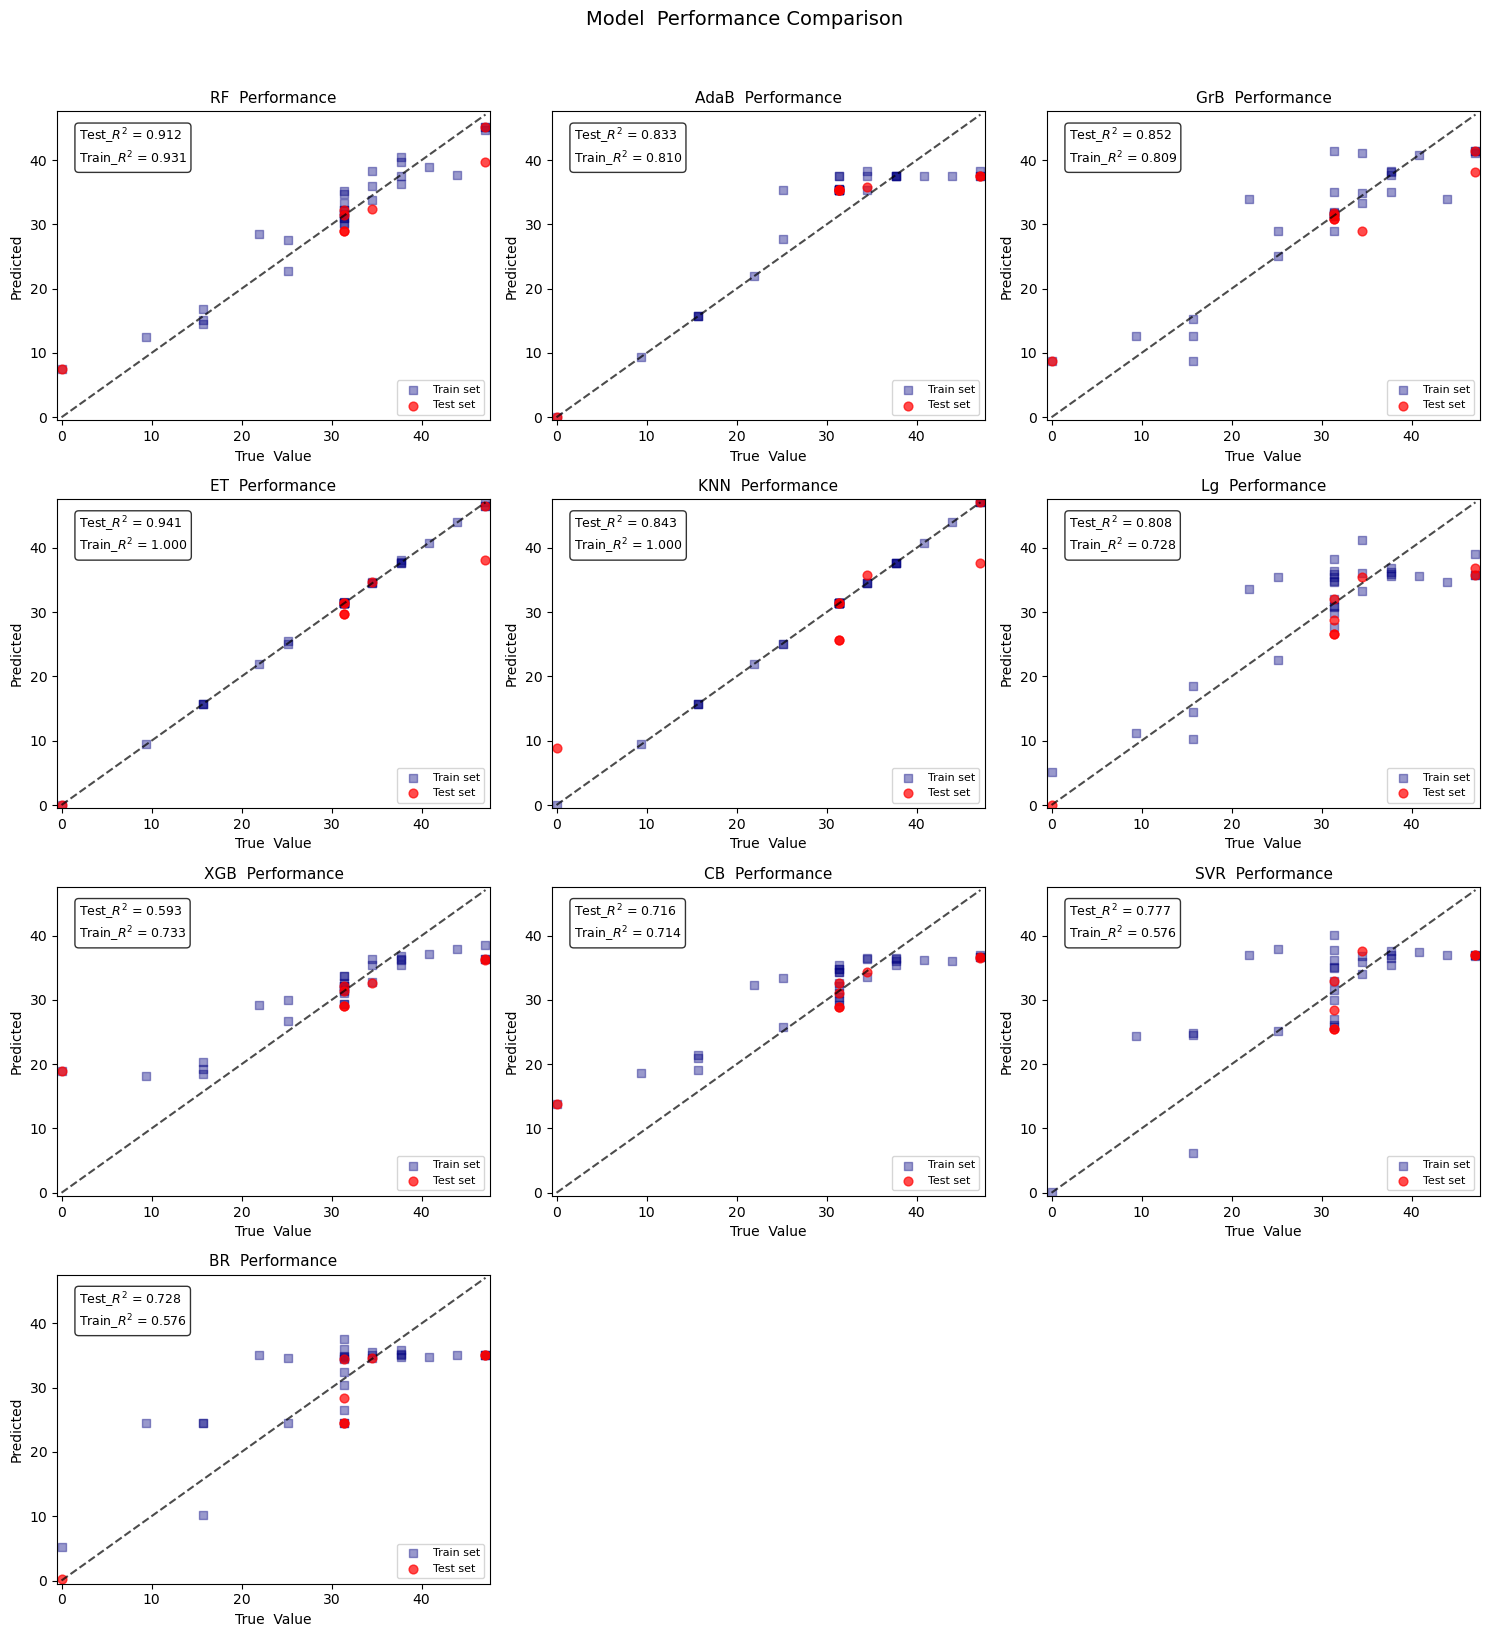

In [27]:
# 自动加载模型
loaded_models = {
    model_name: joblib.load(os.path.join(save_dir,  f'{model_name}_optimized.pkl')) 
    for model_name in models #optimized_models
}
# 生成预测值
y_preds_train = [model.predict(X_train) for model in loaded_models.values()] 
y_preds_test = [model.predict(X_test) for model in loaded_models.values()] 
 
# 设置图形布局
num_models = len(loaded_models)
num_cols = min(3, num_models)
num_rows = (num_models + num_cols - 1) // num_cols
 
fig, axes = plt.subplots(num_rows,  num_cols,
                         figsize=(5 * num_cols, 4 * num_rows),
                         squeeze=False)
axes = axes.flatten() 
 
# 统一坐标轴范围
all_y = np.concatenate([y_train,  y_test])
y_min, y_max = all_y.min(),  all_y.max() 
 
# 遍历每个模型
for i, (ax, (model_name, model)) in enumerate(zip(axes, loaded_models.items())): 
    y_pred_train = y_preds_train[i]
    y_pred_test = y_preds_test[i]
 
    # 计算评估指标
    mse = mean_squared_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    Test_r2 = r2_score(y_test, y_pred_test)
    Train_r2 = r2_score(y_train, y_pred_train)

 
    # 绘图
    ax.scatter(y_train,  y_pred_train, color='navy', label='Train set', marker='s', alpha=0.4, s=40)
    ax.scatter(y_test,  y_pred_test, color='red', label='Test set', marker='o', alpha=0.7, s=40)
    ax.plot([y_min,  y_max], [y_min, y_max], 'k--', lw=1.5, alpha=0.7)
 
    # 设置标题和坐标轴
    ax.set_xlabel('True  Value', fontsize=10)
    ax.set_ylabel('Predicted', fontsize=10)
    ax.set_title(f'{model_name}  Performance', fontsize=11)
    ax.set_xlim([y_min  - 0.5, y_max + 0.5])
    ax.set_ylim([y_min  - 0.5, y_max + 0.5])
 
    # 添加评估指标
    textstr = f'Test_$R^2$ = {Test_r2:.3f}\nTrain_$R^2$ = {Train_r2:.3f}'
    props = dict(boxstyle='round', facecolor='white', alpha=0.8)
    ax.text(0.05,  0.95, textstr, transform=ax.transAxes,  fontsize=9, verticalalignment='top', bbox=props)
 
    # 图例
    ax.legend(loc='lower right', fontsize=8)
 
# 删除多余的空图 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j]) 
 
# 布局调整 
plt.suptitle('Model  Performance Comparison', y=1.02, fontsize=14)
plt.tight_layout() 
plt.savefig('model_comparison.png',  dpi=300, bbox_inches='tight')
plt.show() 

In [28]:
from sklearn.metrics  import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score
import numpy as np 
import pandas as pd 
import joblib 
from sklearn.base  import clone 
from sklearn.ensemble  import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model  import Ridge, Lasso 
from sklearn.preprocessing  import MinMaxScaler 
from sklearn.neural_network  import MLPRegressor 
from scipy.stats  import pearsonr 
from sklearn.model_selection  import KFold 
 
# 初始化存储结果的容器 
selected_models = {}  # 存储筛选后的模型对象（未训练状态）
trained_models = {}   # 新增：存储训练好的模型（用于相关性分析）
results_selected = []  # 存储筛选后的模型指标
 
# ====================== 修改1：优化模型筛选逻辑 ======================
for model_name, model in loaded_models.items():   
    model_clone = clone(model)
    model_clone.fit(X_train,  y_train)
    y_pred = model_clone.predict(X_test)   
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,  y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    ev = explained_variance_score(y_test, y_pred)
    
    # 放宽筛选条件并增加性能稳定性检查 
    if r2 >= 0.75:  # 降低阈值以保留更多潜在有用模型
        print(f"[Selected] {model_name}: R² = {r2:.4f}, RMSE = {rmse:.4f}, MAE = {mae:.4f}")
        selected_models[model_name] = model
        trained_models[model_name] = model_clone  # 保存训练好的模型
        
        # 添加稳定性指标：计算训练集和测试集性能差异
        y_train_pred = model_clone.predict(X_train) 
        train_r2 = r2_score(y_train, y_train_pred)
        r2_diff = abs(train_r2 - r2)
        
        results_selected.append({   
            'Model': model_name,
            'R2': r2,
            'RMSE': rmse,
            'MAE': mae,
            'EV': ev,
            'R2_Diff': r2_diff  # 新增稳定性指标
        })
    else:
        print(f"[Skipped] {model_name}: R² = {r2:.4f} (below threshold)")
 
# 转换为DataFrame
results_selected_df = pd.DataFrame(results_selected)
 
if results_selected_df.empty:  
    print("\n⚠️ 警告：没有模型满足R²≥0.75的条件，无法进行后续分析！")
    print("请检查模型性能或降低阈值")
else:
    # 按综合指标排序（考虑性能和稳定性）
    results_selected_df = results_selected_df.sort_values( 
        by=['R2', 'R2_Diff'], 
        ascending=[False, True]
    ).reset_index(drop=True)
 
    print("\n=== 筛选后的模型 (R² ≥ 0.75) ===")
    print(results_selected_df[['Model', 'R2', 'R2_Diff']])
    
    # ====================== 修改2：增加模型多样性筛选 ======================
    # 计算模型预测之间的相关性矩阵 
    print("\n=== 模型预测相关性分析 ===")
    corr_matrix = pd.DataFrame(index=trained_models.keys(),  columns=trained_models.keys()) 
    
    # 在验证集上计算模型预测相关性 
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_predictions = {name: [] for name in trained_models.keys()} 
    
    for train_idx, val_idx in kf.split(X_train): 
        X_fold_train, X_fold_val = X_train.iloc[train_idx],  X_train.iloc[val_idx] 
        y_fold_train = y_train.iloc[train_idx] 
        
        for name, model in trained_models.items(): 
            # 克隆模型避免污染原始模型
            fold_model = clone(model)
            fold_model.fit(X_fold_train,  y_fold_train)
            fold_pred = fold_model.predict(X_fold_val) 
            fold_predictions[name].extend(fold_pred)
    
    # 计算相关系数矩阵 
    for model1 in trained_models.keys(): 
        for model2 in trained_models.keys(): 
            corr, _ = pearsonr(fold_predictions[model1], fold_predictions[model2])
            corr_matrix.loc[model1,  model2] = abs(corr)  # 取绝对值
    
    print(corr_matrix)
    
    # 选择低相关性的模型组合
    diverse_models = []
    current_models = []
    
    for model in results_selected_df['Model']:
        if not current_models:
            diverse_models.append(model) 
            current_models.append(model) 
            continue 
            
        # 计算当前模型与已选模型的相关性
        max_corr = max([corr_matrix.loc[model,  m] for m in current_models])
        
        # 仅添加相关性<0.7的模型（可调整）
        if max_corr < 0.7:
            diverse_models.append(model) 
            current_models.append(model) 
    
    print(f"\n基于多样性筛选的模型: {diverse_models}")
    
    # 更新选中的模型列表 
    selected_models = {name: selected_models[name] for name in diverse_models}
    trained_models = {name: trained_models[name] for name in diverse_models}
    
    # ====================== 修改3：优化堆叠模型配置 ======================
    # 构建基模型列表
    base_learners = list(selected_models.items()) 
    
    # 优化元模型配置 
    meta_model = MLPRegressor(
        hidden_layer_sizes=(100, 50),
        activation='relu',
        solver='adam',
        max_iter=1000,
        random_state=42 
    )
    
    # 使用多阶段堆叠 
    print("\n=== 构建多阶段堆叠模型 ===")
    
    # 第一阶段：使用不同算法的模型组合 
    stacking_model = StackingRegressor(
        estimators=base_learners,
        final_estimator=meta_model,
        cv=10,  # 增加交叉验证折数
        passthrough=False,  # 不使用原始特征（减少过拟合风险）
        n_jobs=-1 
    )
    
    # 训练堆叠模型
    print("训练堆叠模型中...")
    stacking_model.fit(X_train,  y_train)
    
    # ====================== 修改4：增强模型评估 ======================
    print("\n=== 堆叠模型性能评估 ===")
    
    # 计算训练集和测试集预测 
    y_train_pred = stacking_model.predict(X_train) 
    y_test_pred = stacking_model.predict(X_test) 
    
    # 计算各类评估指标 
    metrics = {}
    
    # 训练集指标 
    metrics['Train MSE'] = mean_squared_error(y_train, y_train_pred)
    metrics['Train RMSE'] = np.sqrt(metrics['Train MSE'])
    metrics['Train MAE'] = mean_absolute_error(y_train, y_train_pred)
    metrics['Train R2'] = r2_score(y_train, y_train_pred)
    metrics['Train EV'] = explained_variance_score(y_train, y_train_pred)
    
    # 测试集指标
    metrics['Test MSE'] = mean_squared_error(y_test, y_test_pred)
    metrics['Test RMSE'] = np.sqrt(metrics['Test MSE'])
    metrics['Test MAE'] = mean_absolute_error(y_test, y_test_pred)
    metrics['Test R2'] = r2_score(y_test, y_test_pred)
    metrics['Test EV'] = explained_variance_score(y_test, y_test_pred)
    
    # 增加残差分析 
    residuals = y_test - y_test_pred 
    metrics['Residual Mean'] = residuals.mean() 
    metrics['Residual Std'] = residuals.std() 
    
    # 打印评估指标 
    print(f"训练集 RMSE: {metrics['Train RMSE']:.4f} | 测试集 RMSE: {metrics['Test RMSE']:.4f}")
    print(f"训练集 MAE: {metrics['Train MAE']:.4f} | 测试集 MAE: {metrics['Test MAE']:.4f}")
    print(f"训练集 EV: {metrics['Train EV']:.4f} | 测试集 EV: {metrics['Test EV']:.4f}")
    print(f"训练集 R²: {metrics['Train R2']:.4f} | 测试集 R²: {metrics['Test R2']:.4f}")
    print(f"残差均值: {metrics['Residual Mean']:.4f} | 残差标准差: {metrics['Residual Std']:.4f}")
    
    # 保存模型
    joblib.dump(stacking_model,  'optimized_stacking_regressor.pkl') 
    print("\n优化后的堆叠模型已保存为 'optimized_stacking_regressor.pkl'") 
    
    # 基模型性能对比 
    print("\n=== 基模型与堆叠模型性能对比 ===")
    base_performance = []
    
    for name, model in trained_models.items(): 
        y_pred = model.predict(X_test) 
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test,  y_pred))
        base_performance.append({ 
            'Model': name,
            'R2': r2,
            'RMSE': rmse,
            'Type': 'Base'
        })
    
    # 添加堆叠模型性能 
    base_performance.append({ 
        'Model': 'Stacking',
        'R2': metrics['Test R2'],
        'RMSE': metrics['Test RMSE'],
        'Type': 'Stacking'
    })
    
    performance_df = pd.DataFrame(base_performance)
    print(performance_df.sort_values('R2',  ascending=False))
 
# ====================== 新增功能：堆叠模型分析 ======================
try:
    # 获取基模型预测作为特征 
    X_meta_train = np.column_stack([trained_models[name].predict(X_train)  for name in diverse_models])
    
    # 训练元模型分析
    meta_model.fit(X_meta_train,  y_train)
    
    # 分析特征重要性（权重）
    if hasattr(meta_model, 'coef_'):
        feature_importance = pd.DataFrame({
            'Base Model': diverse_models,
            'Weight': meta_model.coef_.flatten() 
        }).sort_values('Weight', key=abs, ascending=False)
        
        print("\n=== 元模型权重分析 ===")
        print(feature_importance)
        
except Exception as e:
    print(f"\n元模型分析失败: {str(e)}")
#joblib.dump(stacking_model,  os.path.join(save_dir, 'stacking_model.pkl') ) #============================================存盘  =====================================

[Selected] RF: R² = 0.9024, RMSE = 4.2597, MAE = 3.0851
[Selected] AdaB: R² = 0.8553, RMSE = 5.1864, MAE = 4.1992
[Selected] GrB: R² = 0.8458, RMSE = 5.3554, MAE = 3.8138
[Selected] ET: R² = 0.9384, RMSE = 3.3843, MAE = 1.7388
[Selected] KNN: R² = 0.8434, RMSE = 5.3962, MAE = 3.8567
[Selected] Lg: R² = 0.8081, RMSE = 5.9735, MAE = 4.4005
[Skipped] XGB: R² = 0.5928 (below threshold)
[Skipped] CB: R² = 0.7160 (below threshold)
[Selected] SVR: R² = 0.7766, RMSE = 6.4452, MAE = 5.7152
[Skipped] BR: R² = 0.7284 (below threshold)

=== 筛选后的模型 (R² ≥ 0.75) ===
  Model        R2   R2_Diff
0    ET  0.938404  0.061520
1    RF  0.902417  0.022441
2  AdaB  0.855341  0.047673
3   GrB  0.845762  0.037259
4   KNN  0.843402  0.156598
5    Lg  0.808103  0.079709
6   SVR  0.776598  0.200339

=== 模型预测相关性分析 ===
            RF      AdaB       GrB        ET       KNN        Lg       SVR
RF         1.0  0.881488  0.832486  0.947964  0.954475  0.844874  0.717142
AdaB  0.881488       1.0  0.742078  0.871037  0.8


Stacking Model - Train R²: 1.00, Test R²: 0.95
RMSE: 3.0831, MAE: 1.5629
       Model        R²       MAE      RMSE        EV
10  Stacking  0.948879  1.562869  3.083141  0.954771
3         ET  0.940921  1.648500  3.314448  0.954712
0         RF  0.911730  3.081125  4.051345  0.917202
2        GrB  0.851839  3.823794  5.248809  0.864159
4        KNN  0.843402  3.856739  5.396185  0.852833
1       AdaB  0.833156  4.539372  5.569917  0.833486
5         Lg  0.808103  4.400461  5.973482  0.894000
8        SVR  0.776598  5.715176  6.445211  0.887039
9         BR  0.728441  5.528076  7.105999  0.846839
7         CB  0.716034  5.160765  7.266521  0.726906
6        XGB  0.592792  5.984843  8.701644  0.598574


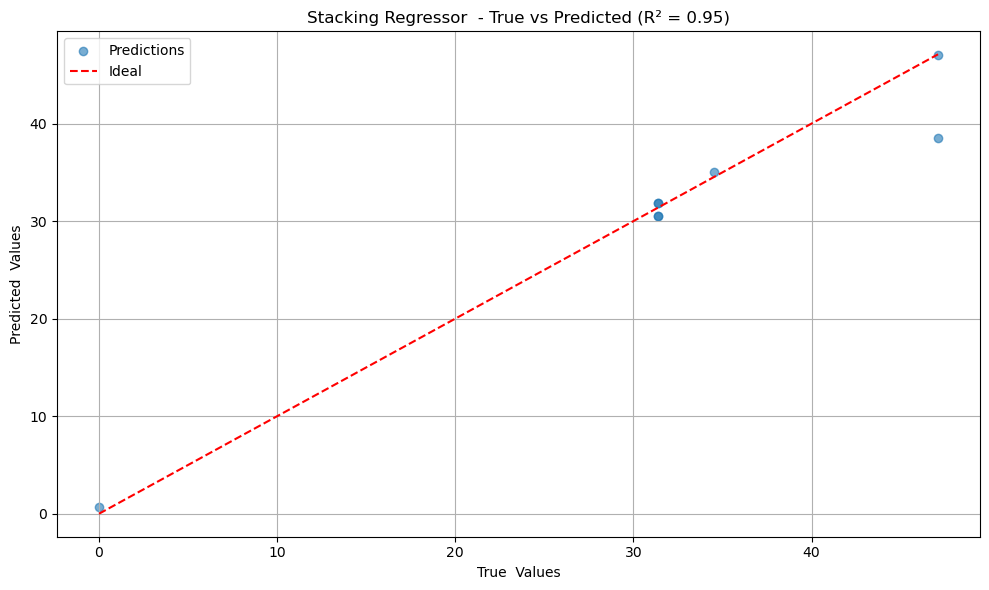

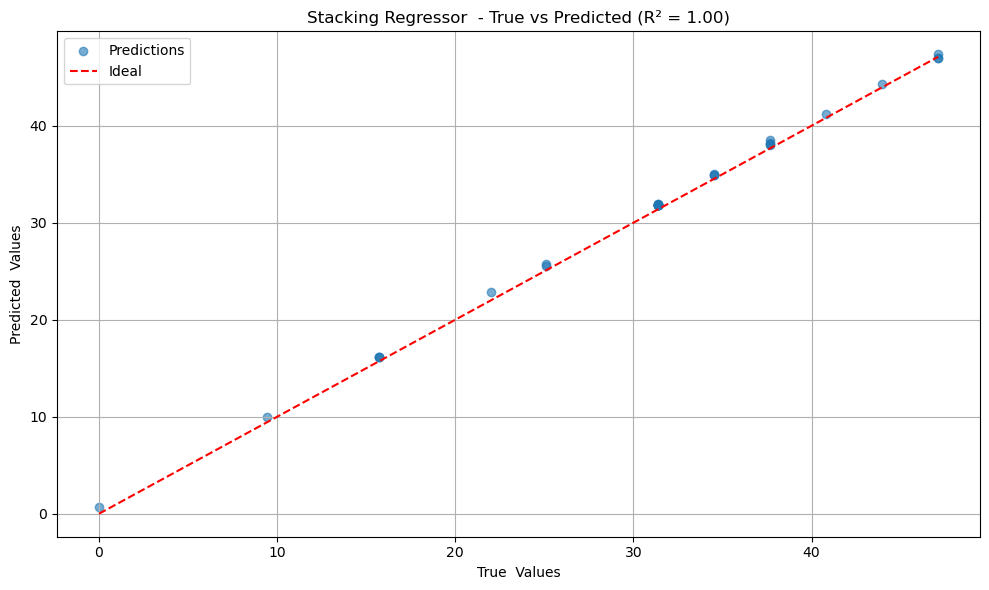

Mean Squared Error: 9.50575818561963
Mean Absolute Error: 1.5628685764952128
R^2 Score: 0.9488789023843683


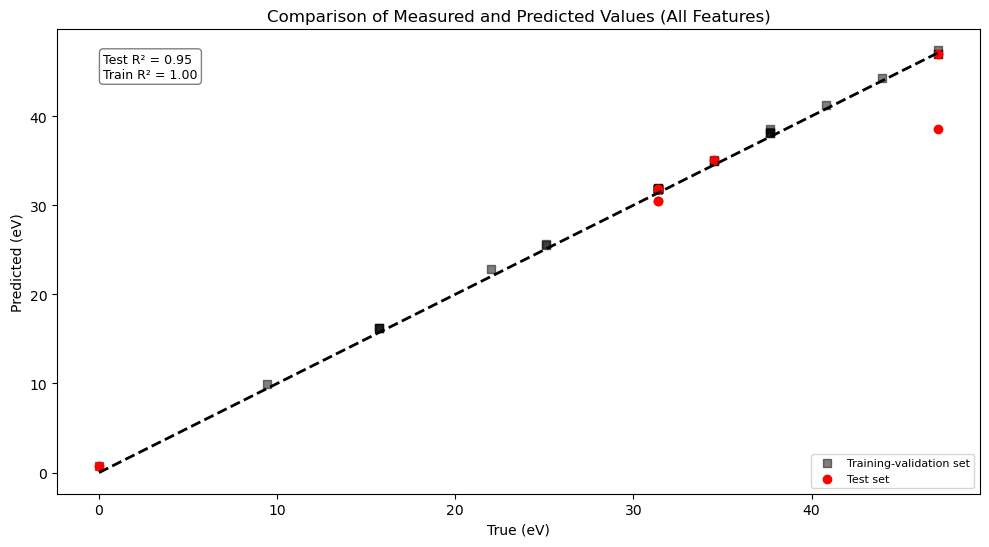

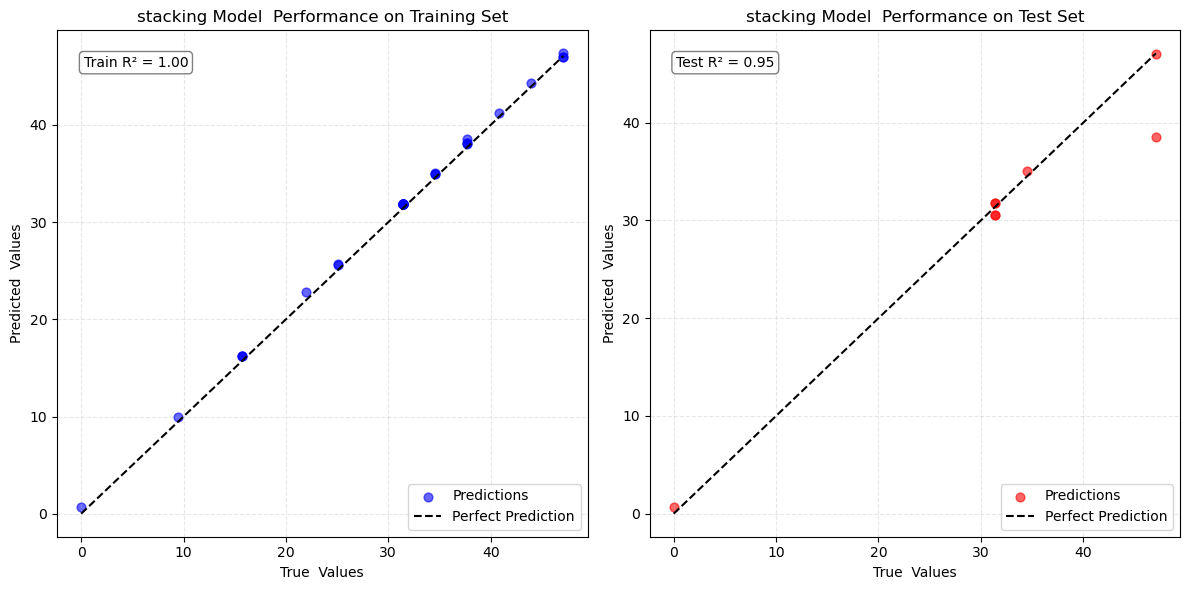

In [29]:
import matplotlib.pyplot  as plt 
from sklearn.metrics  import r2_score  # 添加缺失的导入 

#stacking_model=joblib.load(os.path.join(save_dir, 'stacking_model.pkl'))

results_df= pd.read_csv(os.path.join(save_dir,  "results.csv"))
results= results_df.to_dict('records')  
y_train_pred = stacking_model.predict(X_train) 
y_test_pred = stacking_model.predict(X_test) 

 
train_r2 = stacking_model.score(X_train,  y_train)
test_r2 = stacking_model.score(X_test,  y_test)
rmse = np.sqrt(mean_squared_error(y_test,  y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
ev = explained_variance_score(y_test, y_test_pred)
 
print(f"\nStacking Model - Train R²: {train_r2:.2f}, Test R²: {test_r2:.2f}")
print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}")
 
 
# 添加 stacking 结果
results.append({ 
    'Model': 'Stacking',
    'R²': test_r2,
    'RMSE': rmse,
    'MAE': mae,
    'EV': ev
})
 
# 构建结果 DataFrame
results_df = pd.DataFrame(results).sort_values(by='R²', ascending=False)
print(results_df)


# 可视化预测 vs 实际值
def plot_regression_results(y_true, y_pred, model_name):
    plt.figure(figsize=(10,  6))
    plt.scatter(y_true,  y_pred, alpha=0.6, label='Predictions')
    plt.plot([y_true.min(),  y_true.max()],  [y_true.min(),  y_true.max()],  'r--', label='Ideal')
    plt.xlabel("True  Values")
    plt.ylabel("Predicted  Values")
    plt.title(f"{model_name}  - True vs Predicted (R² = {r2_score(y_true, y_pred):.2f})")
    plt.legend() 
    plt.grid(True) 
    plt.tight_layout() 
    plt.show() 
 
plot_regression_results(y_test, y_test_pred, "Stacking Regressor")

def plot_regression_results(y_true, y_pred, model_name):
    plt.figure(figsize=(10,  6))
    plt.scatter(y_true,  y_pred, alpha=0.6, label='Predictions')
    plt.plot([y_true.min(),  y_true.max()],  [y_true.min(),  y_true.max()],  'r--', label='Ideal')
    plt.xlabel("True  Values")
    plt.ylabel("Predicted  Values")
    plt.title(f"{model_name}  - True vs Predicted (R² = {r2_score(y_true, y_pred):.2f})")
    plt.legend() 
    plt.grid(True) 
    plt.tight_layout() 
    plt.show() 
 
plot_regression_results(y_train, y_train_pred, "Stacking Regressor")

 
y_pred_best_model = stacking_model.predict(X_test)
y_pred_train = stacking_model.predict(X_train)
best_mae = mean_absolute_error(y_test, y_pred_best_model)
mse = mean_squared_error(y_test, y_pred_best_model)
mae = mean_absolute_error(y_test,y_pred_best_model)
best_r2 = r2_score(y_test, y_pred_best_model)
best_r2_train = r2_score(y_train, y_pred_train)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {best_r2}")
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y_train, y_pred_train, color='black', label='Training-validation set', marker='s', alpha=0.5)
ax.scatter(y_test, y_pred_best_model, color='red', label='Test set', marker='o')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('True (eV)')
ax.set_ylabel('Predicted (eV)')
ax.set_title('Comparison of Measured and Predicted Values (All Features)')
# 添加 R² 和 MAE 评分文本
textstr = f'Test R² = {best_r2:.2f}\nTrain R² = {best_r2_train:.2f}'
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

# 在图的左上方添加文本
ax.text(0.05,  0.95, textstr, transform=ax.transAxes,  fontsize=9, verticalalignment='top', bbox=props)
 
    # 图例
ax.legend(loc='lower right', fontsize=8)
#plt.legend()
plt.tight_layout(rect=[0, 0, 1, 0.93])  # 调整图形布局
plt.show()




 
def plot_model_performance(y_train, y_train_pred, y_test, y_test_pred):
    """
    绘制模型预测性能对比图 
    参数:
        y_train -- 训练集真实值 
        y_train_pred -- 训练集预测值 
        y_test -- 测试集真实值 
        y_test_pred -- 测试集预测值 
    """
    plt.figure(figsize=(12,  6))
    
    # 计算R²分数 
    r2_train = r2_score(y_train, y_train_pred)  # 修正变量名 
    r2_test = r2_score(y_test, y_test_pred)     # 修正变量名 
    
    # 创建子图 
    ax1 = plt.subplot(1,  2, 1)
    ax2 = plt.subplot(1,  2, 2)
    
    # 通用格式设置 
    bbox_props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    line_kwargs = {'color': 'black', 'linestyle': '--', 'label': 'Perfect Prediction'}
    scatter_kwargs = {'alpha': 0.6, 's': 40}
    
    # 训练集子图 
    ax1.scatter(y_train,  y_train_pred, color='blue', **scatter_kwargs, label='Predictions')
    ax1.plot([min(y_train),  max(y_train)], [min(y_train), max(y_train)], **line_kwargs)
    ax1.text(0.05,  0.95, f'Train R² = {r2_train:.2f}', 
            transform=ax1.transAxes,  fontsize=10, 
            verticalalignment='top', bbox=bbox_props)
    ax1.set_xlabel('True  Values')
    ax1.set_ylabel('Predicted  Values')
    ax1.set_title('stacking Model  Performance on Training Set')
    ax1.legend(loc='lower right')
    ax1.grid(True,  linestyle='--', alpha=0.3)
    
    # 测试集子图 
    ax2.scatter(y_test,  y_test_pred, color='red', **scatter_kwargs, label='Predictions')
    ax2.plot([min(y_test),  max(y_test)], [min(y_test), max(y_test)], **line_kwargs)
    ax2.text(0.05,  0.95, f'Test R² = {r2_test:.2f}', 
            transform=ax2.transAxes,  fontsize=10, 
            verticalalignment='top', bbox=bbox_props)
    ax2.set_xlabel('True  Values')
    ax2.set_ylabel('Predicted  Values')
    ax2.set_title('stacking Model  Performance on Test Set')
    ax2.legend(loc='lower right')
    ax2.grid(True,  linestyle='--', alpha=0.3)
 
    plt.tight_layout() 
    plt.show() 
 



plot_model_performance(y_train, y_train_pred, y_test, y_test_pred)

## 给出了达到最优值的所有特征组合

In [30]:
import numpy as np 
import joblib 
from deap import base, creator, tools, algorithms 
from pprint import pprint 
import warnings 
from typing import Tuple, Optional, List, Dict 
 
warnings.filterwarnings('ignore',  category=UserWarning) 
 
class GeneticOptimizer: 
    def __init__(self, model_path: str, X_train: np.ndarray,  feature_names: list = None, max_scale_factor: float = 2.0): 
        """遗传算法优化器（特征范围基于原始数据的最小值和最大值倍数） 
        
        参数: 
            model_path: 模型文件路径 
            X_train: 训练数据(用于确定特征边界) 
            feature_names: 特征名称列表 
            max_scale_factor: 上界缩放系数（默认2.0） 
        """ 
        self.model  = joblib.load(model_path)  if isinstance(model_path, str) else model_path 
        X_train = np.asarray(X_train)    
        
        # 确保X_train是二维数组 
        if len(X_train.shape)  == 1: 
            X_train = X_train.reshape(-1,  1) 
            
        # 使用原始数据的最小值作为特征下界 
        self.feature_mins  = X_train.min(axis=0).ravel()    # 每个特征的原始最小值 
        
        # 上界设为原始最大值的max_scale_factor倍 
        self.feature_maxs  = np.maximum(    
            max_scale_factor * X_train.max(axis=0).ravel(),    
            self.feature_mins  + 1e-6  # 确保上下界有间隔 
        ) 
        
        self.n_features = X_train.shape[1]    
        self.feature_names  = feature_names if feature_names else [f"Feature_{i}" for i in range(self.n_features)] 
        
        if len(self.feature_names)  != self.n_features: 
            raise ValueError(f"特征名称数量({len(self.feature_names)}) 与特征维度({self.n_features})不匹配") 
            
        self._print_feature_info()  # 打印特征范围信息 
        self.optimal_solutions  = []  # 存储所有最优解 
    
    def _print_feature_info(self): 
        """打印特征信息""" 
        print(f"特征空间维度: {self.n_features}") 
        print("特征边界范围（基于原始数据）:") 
        for name, min_val, max_val in zip(self.feature_names,  self.feature_mins,  self.feature_maxs):    
            print(f"{name}: [{min_val:.4f}, {max_val:.4f}] (连续值)") 
    
    def _evaluate_point(self, point: np.ndarray)  -> float: 
        """评估单个点，强制应用边界约束""" 
        point = np.asarray(point)    
        if len(point.shape)  == 1: 
            point = point.reshape(1,  -1) 
        point = np.clip(point,  self.feature_mins,  self.feature_maxs)    # 强制在原始最小值和最大值倍数之间 
        return self.model.predict(point)[0]    
    
    def _print_optimization_result(self, max_value: float, optimal_point: np.ndarray,  **kwargs): 
        """格式化输出优化结果""" 
        print("\n" + "="*50) 
        print("遗传算法优化结果:") 
        print(f"最大预测值: {max_value:.4f}") 
        
        for k, v in kwargs.items():    
            print(f"{k}: {v}") 
            
        print("\n最优特征组合:") 
        optimal_point = np.clip(optimal_point,  self.feature_mins,  self.feature_maxs)    # 确保符合当前约束 
        
        for name, value in zip(self.feature_names,  optimal_point): 
            print(f"{name}: {value:.4f}") 
            
        # 修改点：按照第一个特征"Volume of KH550 (mL)"排序 
        if len(self.optimal_solutions)  > 1: 
            print(f"\n所有达到最优值的特征组合（按'{self.feature_names[0]}' 升序排列）:") 
            
            # 按第一个特征值排序 
            sorted_solutions = sorted(self.optimal_solutions,  key=lambda x: x[0])
            
            for i, solution in enumerate(sorted_solutions, 1): 
                print(f"\n解 {i}:") 
                for name, value in zip(self.feature_names,  solution): 
                    print(f"{name}: {value:.4f}") 
        print("="*50) 
 
    def optimize(self, pop_size: int = 200, generations: int = 100, 
                cx_prob: float = 0.5, mut_prob: float = 0.8) -> Tuple[np.ndarray, float, List[np.ndarray]]: 
        """运行遗传算法优化""" 
        creator.create("FitnessMax",  base.Fitness, weights=(1.0,)) 
        creator.create("Individual",  np.ndarray,  fitness=creator.FitnessMax) 
 
        toolbox = base.Toolbox() 
        
        # 初始化个体时使用 [feature_mins, feature_maxs] 范围 
        def attr_float(): 
            return np.random.uniform(self.feature_mins,  self.feature_maxs,  size=self.n_features) 
            
        toolbox.register("attr_float",  attr_float) 
        toolbox.register("individual",  tools.initIterate,  creator.Individual, toolbox.attr_float)    
        toolbox.register("population",  tools.initRepeat,  list, toolbox.individual)    
        
        toolbox.register("evaluate",  lambda ind: (self._evaluate_point(ind),)) 
        
        # 交叉算子中使用 feature_mins[i] 作为下界 
        def cxSimulatedBinaryBounded(ind1, ind2, eta=15.0): 
            size = min(len(ind1), len(ind2)) 
            for i in range(size): 
                if np.random.random()  < 0.5: 
                    continue 
                    
                x1, x2 = ind1[i], ind2[i] 
                # 修正：下界从0改为 feature_mins[i] 
                x1 = np.clip(x1,  self.feature_mins[i],  self.feature_maxs[i])    
                x2 = np.clip(x2,  self.feature_mins[i],  self.feature_maxs[i])    
                
                # 交叉逻辑不变（基于SBX算子） 
                rand = np.random.random()    
                if rand <= 0.5: 
                    beta = (2.0 * rand) ** (1.0 / (eta + 1.0)) 
                else: 
                    beta = (1.0 / (2.0 * (1.0 - rand))) ** (1.0 / (eta + 1.0)) 
                    
                c1 = 0.5 * ((x1 + x2) - beta * abs(x2 - x1)) 
                c2 = 0.5 * ((x1 + x2) + beta * abs(x2 - x1)) 
                
                # 修正：上下界约束为 [feature_mins[i], feature_maxs[i]] 
                c1 = np.clip(c1,  self.feature_mins[i],  self.feature_maxs[i])    
                c2 = np.clip(c2,  self.feature_mins[i],  self.feature_maxs[i])    
                
                ind1[i], ind2[i] = c1, c2 
            return ind1, ind2 
            
        toolbox.register("mate",  cxSimulatedBinaryBounded, eta=15.0) 
        
        # 变异算子中使用 feature_mins[i] 作为下界 
        def custom_mutate(individual, indpb): 
            for i in range(len(individual)): 
                if np.random.random()  < indpb: 
                    # 变异步长基于特征范围（上界-下界）的10% 
                    mutation_step = (self.feature_maxs[i]  - self.feature_mins[i])  * 0.1 
                    # 修正：下界从0改为 feature_mins[i] 
                    individual[i] = np.clip(    
                        individual[i] + np.random.normal(0,  mutation_step), 
                        self.feature_mins[i],    # 下界：原始最小值 
                        self.feature_maxs[i]     # 上界：最大值倍数 
                    ) 
            return individual, 
            
        toolbox.register("mutate",  custom_mutate, indpb=0.2) 
        toolbox.register("select",  tools.selTournament,  tournsize=3) 
        
        stats = tools.Statistics(lambda ind: ind.fitness.values[0])    
        stats.register("max",  np.max)    
        stats.register("avg",  np.mean)    
        
        population = toolbox.population(n=pop_size)    
        population, logbook = algorithms.eaSimple(    
            population, toolbox, 
            cxpb=cx_prob, mutpb=mut_prob, 
            ngen=generations, stats=stats, 
            verbose=True 
        ) 
 
        # 获取所有个体的适应度值和特征值 
        fitness_values = [ind.fitness.values[0] for ind in population] 
        max_fitness = max(fitness_values) 
        
        # 收集最优解时使用 feature_mins 作为下界 
        self.optimal_solutions  = [] 
        for ind in population: 
            if ind.fitness.values[0]  == max_fitness: 
                optimal_point = np.clip(ind,  self.feature_mins,  self.feature_maxs)   
                self.optimal_solutions.append(optimal_point)   
        
        # 去重处理 
        unique_solutions = [] 
        seen = set() 
        for sol in self.optimal_solutions:   
            sol_tuple = tuple(np.round(sol,  4)) 
            if sol_tuple not in seen: 
                seen.add(sol_tuple)   
                unique_solutions.append(sol)   
        self.optimal_solutions  = unique_solutions 
        
        best_individual = self.optimal_solutions[0]    # 取第一个最优解作为代表 
        best_value = max_fitness 
        
        self._print_optimization_result( 
            best_value, 
            best_individual, 
            generations=generations, 
            population_size=pop_size, 
            crossover_probability=cx_prob, 
            mutation_probability=mut_prob 
        ) 
        
        return best_individual, best_value, self.optimal_solutions     
 
# 使用示例 
Features = X_train.columns.tolist()   
optimizer = GeneticOptimizer(stacking_model, X_train, feature_names=Features, max_scale_factor=1.0) 
optimal_point, max_value, all_optimal_points = optimizer.optimize()    
np.save('genetic_optimization_result.npy',  optimal_point)

特征空间维度: 6
特征边界范围（基于原始数据）:
Volume of KH550 (mL): [0.1000, 3.0000] (连续值)
Temperature (℃): [40.0000, 90.0000] (连续值)
Reaction time (h): [1.0000, 12.0000] (连续值)
Protein incubation time (h): [0.5000, 4.0000] (连续值)
Imidazole concentration (mM): [250.0000, 3500.0000] (连续值)
Volume of imidazole (μL): [60.0000, 1800.0000] (连续值)


c:\ProgramData\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\ProgramData\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	max    	avg    
0  	200   	36.2177	22.7863
1  	174   	37.7205	27.5982
2  	179   	37.7205	30.7399
3  	178   	36.343 	32.6586
4  	174   	40.2877	33.8825
5  	186   	41.9157	35.0314
6  	178   	43.5437	35.9988
7  	184   	45.2969	37.0893
8  	180   	44.9525	38.169 
9  	179   	44.9525	39.469 
10 	185   	45.4221	40.7742
11 	177   	45.4221	41.6504
12 	181   	45.5161	42.1206
13 	180   	45.8604	43.0882
14 	180   	46.1422	43.0168
15 	174   	46.2048	43.251 
16 	174   	46.9875	43.5083
17 	183   	46.9875	44.24  
18 	175   	46.9875	44.4619
19 	177   	46.9875	44.4756
20 	182   	47.0188	44.2376
21 	181   	47.3632	43.9901
22 	181   	47.3006	44.49  
23 	180   	47.3006	44.8369
24 	183   	47.3632	44.8008
25 	178   	47.3632	44.8882
26 	180   	47.3632	45.0377
27 	175   	47.3632	45.1552
28 	178   	47.3632	45.3354
29 	184   	47.3632	45.2022
30 	175   	47.3632	45.0846
31 	171   	47.3632	45.25  
32 	184   	47.3632	45.2143
33 	178   	47.3632	45.4037
34 	178   	47.3632	45.2813
35 	178   	47.3632	44.7808
3

## 增强型模拟退火

In [39]:
import numpy as np 
import joblib 
from pprint import pprint 
import warnings 
from typing import Tuple, Optional, List, Dict 
from pyswarm import pso  # 引入粒子群优化库 
 
warnings.filterwarnings('ignore',  category=UserWarning) 
 
class ParticleSwarmOptimizer:
    def __init__(self, model_path: str, X_train: np.ndarray,  feature_names: list = None, max_scale_factor: float = 2.0):
        """
        粒子群算法优化器（特征范围基于原始数据的最小值和最大值倍数）
        
        参数:
            model_path: 模型文件路径
            X_train: 训练数据(用于确定特征边界)
            feature_names: 特征名称列表
            max_scale_factor: 上界缩放系数（默认2.0）
        """
        self.model  = joblib.load(model_path)  if isinstance(model_path, str) else model_path
        X_train = np.asarray(X_train) 
        
        # 确保X_train是二维数组 
        if len(X_train.shape)  == 1:
            X_train = X_train.reshape(-1,  1)
            
        # 使用原始数据的最小值作为特征下界 
        self.feature_mins  = X_train.min(axis=0).ravel() 
        
        # 上界设为原始最大值的max_scale_factor倍
        self.feature_maxs  = np.maximum( 
            max_scale_factor * X_train.max(axis=0).ravel(), 
            self.feature_mins  + 1e-6  # 确保上下界有间隔
        )
        
        self.n_features = X_train.shape[1] 
        self.feature_names  = feature_names if feature_names else [f"Feature_{i}" for i in range(self.n_features)]
        
        if len(self.feature_names)  != self.n_features:
            raise ValueError(f"特征名称数量({len(self.feature_names)}) 与特征维度({self.n_features})不匹配")
            
        self._print_feature_info()  # 打印特征范围信息 
        self.optimal_solutions  = []  # 存储所有最优解 
    
    def _print_feature_info(self):
        """打印特征信息"""
        print(f"特征空间维度: {self.n_features}")
        print("特征边界范围（基于原始数据）:")
        for name, min_val, max_val in zip(self.feature_names,  self.feature_mins,  self.feature_maxs): 
            print(f"{name}: [{min_val:.4f}, {max_val:.4f}] (连续值)")
    
    def _evaluate_point(self, point: np.ndarray)  -> float:
        """评估单个点，强制应用边界约束"""
        point = np.asarray(point) 
        if len(point.shape)  == 1:
            point = point.reshape(1,  -1)
        point = np.clip(point,  self.feature_mins,  self.feature_maxs) 
        return self.model.predict(point)[0] 
    
    def _print_optimization_result(self, max_value: float, optimal_point: np.ndarray,  **kwargs):
        """格式化输出优化结果"""
        print("\n" + "="*50)
        print("粒子群算法优化结果:")
        print(f"最大预测值: {max_value:.4f}")
        
        for k, v in kwargs.items(): 
            print(f"{k}: {v}")
            
        print("\n最优特征组合:")
        optimal_point = np.clip(optimal_point,  self.feature_mins,  self.feature_maxs) 
        
        for name, value in zip(self.feature_names,  optimal_point):
            print(f"{name}: {value:.4f}")
            
        if len(self.optimal_solutions)  > 1:
            print("\n所有达到最优值的特征组合:")
            for i, solution in enumerate(self.optimal_solutions,  1):
                print(f"\n解 {i}:")
                for name, value in zip(self.feature_names,  solution):
                    print(f"{name}: {value:.4f}")
        print("="*50)
 
    def optimize(self, swarmsize: int = 200, maxiter: int = 200, 
                omega: float = 0.5, phip: float = 0.5, phig: float = 0.5) -> Tuple[np.ndarray, float, List[np.ndarray]]:
        """
        运行粒子群算法优化
        
        参数:
            swarmsize: 粒子群大小 
            maxiter: 最大迭代次数
            omega: 惯性权重 
            phip: 认知系数(个体最优引导)
            phig: 社会系数(全局最优引导)
        """
        # 定义目标函数(PSO是求最小化，所以我们取负值)
        def objective_function(x):
            return -self._evaluate_point(x)
        
        # 运行粒子群优化 
        xopt, fopt = pso(
            func=objective_function,
            lb=self.feature_mins, 
            ub=self.feature_maxs, 
            swarmsize=swarmsize,
            maxiter=maxiter,
            omega=omega,
            phip=phip,
            phig=phig 
        )
        
        # 获取最优值和最优解
        max_value = -fopt  # 因为我们之前取了负值
        optimal_point = np.clip(xopt,  self.feature_mins,  self.feature_maxs) 
        self.optimal_solutions  = [optimal_point]  # PSO通常只返回一个最优解 
        
        self._print_optimization_result(
            max_value,
            optimal_point,
            iterations=maxiter,
            swarm_size=swarmsize,
            inertia_weight=omega,
            cognitive_coefficient=phip,
            social_coefficient=phig
        )
        
        return optimal_point, max_value, self.optimal_solutions  
 
# 使用示例
Features = X_train.columns.tolist() 
optimizer = ParticleSwarmOptimizer(stacking_model, X_train, feature_names=Features, max_scale_factor=1.0)
optimal_point, max_value, all_optimal_points = optimizer.optimize() 
np.save('pso_optimization_result.npy',  optimal_point)

特征空间维度: 6
特征边界范围（基于原始数据）:
Volume of KH550 (mL): [0.1000, 3.0000] (连续值)
Temperature (℃): [40.0000, 90.0000] (连续值)
Reaction time (h): [1.0000, 12.0000] (连续值)
Protein incubation time (h): [0.5000, 4.0000] (连续值)
Imidazole concentration (mM): [250.0000, 3500.0000] (连续值)
Volume of imidazole (μL): [60.0000, 1800.0000] (连续值)
Stopping search: maximum iterations reached --> 200

粒子群算法优化结果:
最大预测值: 47.3632
iterations: 200
swarm_size: 200
inertia_weight: 0.5
cognitive_coefficient: 0.5
social_coefficient: 0.5

最优特征组合:
Volume of KH550 (mL): 2.3200
Temperature (℃): 40.0000
Reaction time (h): 1.0000
Protein incubation time (h): 3.0065
Imidazole concentration (mM): 538.3935
Volume of imidazole (μL): 600.6545


Feature space dimension: 6
Feature bounds (based on original data):
Volume of KH550 (mL): [0.1000, 3.0000] (continuous)
Temperature (℃): [40.0000, 90.0000] (continuous)
Reaction time (h): [1.0000, 12.0000] (continuous)
Protein incubation time (h): [0.5000, 4.0000] (continuous)
Imidazole concentration (mM): [250.0000, 3500.0000] (continuous)
Volume of imidazole (μL): [60.0000, 1800.0000] (continuous)
Starting PSO optimization...
Iteration 10/100, Best Value: 47.3632
Iteration 20/100, Best Value: 47.3632
Iteration 30/100, Best Value: 47.3632
Iteration 40/100, Best Value: 47.3632
Iteration 50/100, Best Value: 47.3632
Iteration 60/100, Best Value: 47.3632
Iteration 70/100, Best Value: 47.3632
Iteration 80/100, Best Value: 47.3632
Iteration 90/100, Best Value: 47.3632
Iteration 100/100, Best Value: 47.3632

Particle Swarm Optimization Results:
Maximum predicted value: 47.3632
iterations: 100
swarm_size: 500
inertia_weight: 0.5
cognitive_coefficient: 0.5
social_coefficient: 0.5

Optimal feat

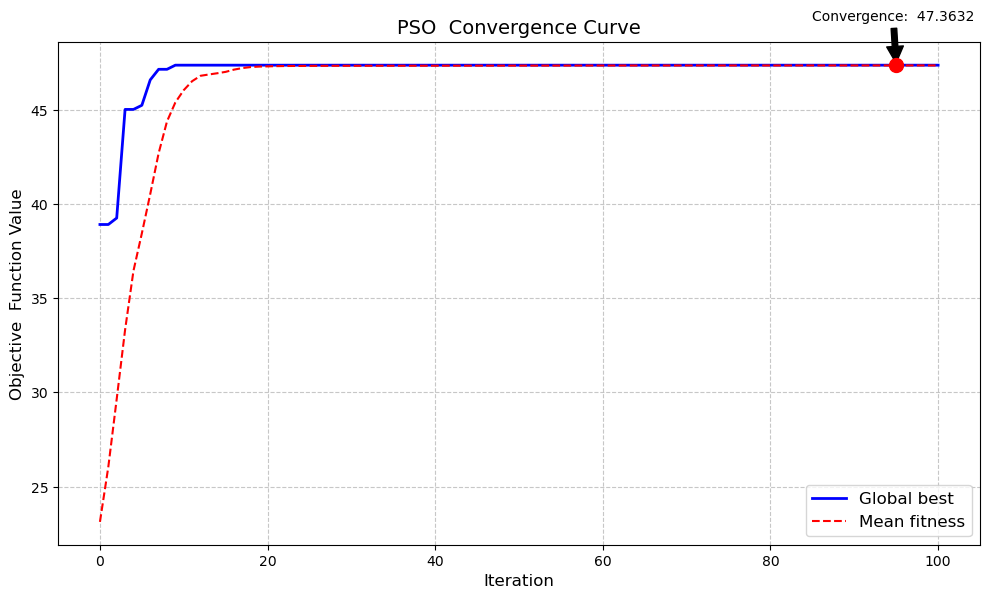

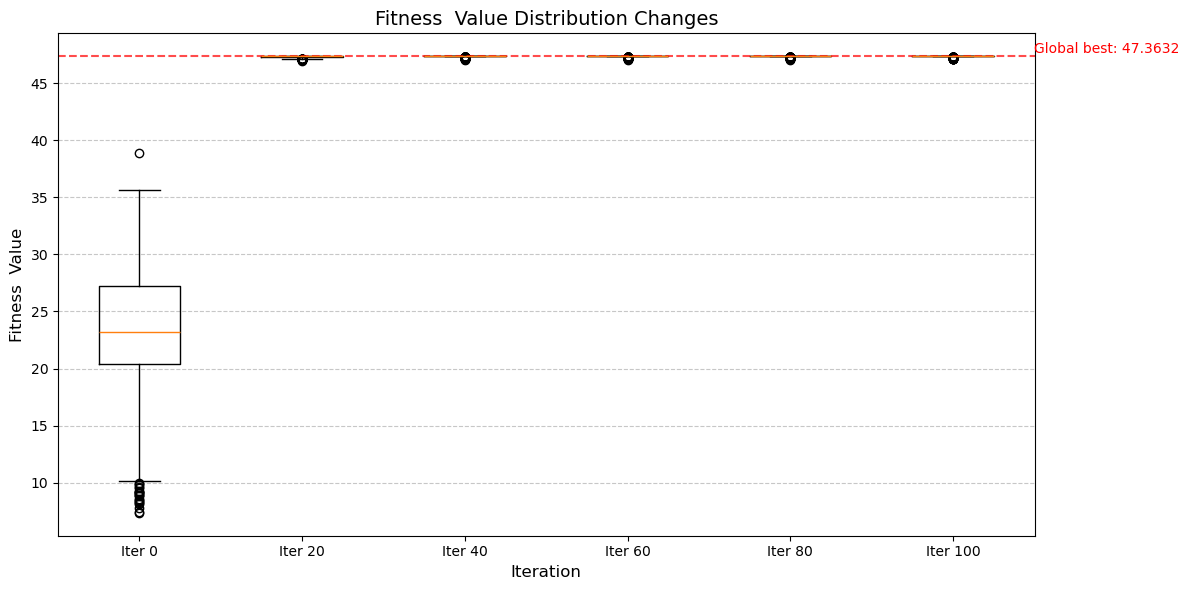

In [33]:
import numpy as np 
import joblib 
from pprint import pprint 
import warnings 
from typing import Tuple, Optional, List, Dict 
import matplotlib.pyplot  as plt 
from matplotlib.animation  import FuncAnimation 
from IPython.display  import HTML 
import seaborn as sns 
 
# Visualization library additions 
warnings.filterwarnings('ignore',  category=UserWarning) 
 
class ParticleSwarmOptimizer:
    def __init__(self, model_path: str, X_train: np.ndarray,    
                 feature_names: list = None, max_scale_factor: float = 2.0):
        """
        Particle Swarm Optimizer (feature bounds based on original data min/max with scaling factor)
        
        Parameters:
            model_path: Path to model file 
            X_train: Training data (used to determine feature bounds)
            feature_names: List of feature names 
            max_scale_factor: Upper bound scaling factor (default 2.0)
        """
        self.model  = joblib.load(model_path)  if isinstance(model_path, str) else model_path 
        X_train = np.asarray(X_train)   
        
        # Ensure X_train is 2D array 
        if len(X_train.shape)  == 1:
            X_train = X_train.reshape(-1,  1)
            
        # Use original data min as feature lower bound 
        self.feature_mins  = X_train.min(axis=0).ravel()   
        
        # Upper bound is max_scale_factor times original max 
        self.feature_maxs  = np.maximum(   
            max_scale_factor * X_train.max(axis=0).ravel(),   
            self.feature_mins  + 1e-6  # Ensure bounds have separation 
        )
        
        self.n_features = X_train.shape[1]   
        self.feature_names  = feature_names if feature_names else [f"Feature_{i}" for i in range(self.n_features)]
        
        if len(self.feature_names)  != self.n_features:
            raise ValueError(f"Number of feature names ({len(self.feature_names)})  doesn't match feature dimension ({self.n_features})")
            
        self._print_feature_info()  # Print feature range info 
        self.optimal_solutions  = []  # Store all optimal solutions 
        
        # Added: Store convergence history 
        self.convergence_history  = {
            'global_best_values': [],
            'mean_fitness': [],
            'particle_positions': [],
            'iterations': []
        }
    
    def _print_feature_info(self):
        """Print feature information"""
        print(f"Feature space dimension: {self.n_features}")
        print("Feature bounds (based on original data):")
        for name, min_val, max_val in zip(self.feature_names,  self.feature_mins,  self.feature_maxs):   
            print(f"{name}: [{min_val:.4f}, {max_val:.4f}] (continuous)")
    
    def _evaluate_point(self, point: np.ndarray)  -> float:
        """Evaluate single point with enforced boundary constraints"""
        point = np.asarray(point)   
        if len(point.shape)  == 1:
            point = point.reshape(1,  -1)
        point = np.clip(point,  self.feature_mins,  self.feature_maxs)   
        return self.model.predict(point)[0]   
    
    def _print_optimization_result(self, max_value: float, optimal_point: np.ndarray,  **kwargs):
        """Format and print optimization results"""
        print("\n" + "="*50)
        print("Particle Swarm Optimization Results:")
        print(f"Maximum predicted value: {max_value:.4f}")
        
        for k, v in kwargs.items():   
            print(f"{k}: {v}")
            
        print("\nOptimal feature combination:")
        optimal_point = np.clip(optimal_point,  self.feature_mins,  self.feature_maxs)   
        
        for name, value in zip(self.feature_names,  optimal_point):
            print(f"{name}: {value:.4f}")
            
        if len(self.optimal_solutions)  > 1:
            print("\nAll solutions achieving optimal value:")
            for i, solution in enumerate(self.optimal_solutions,  1):
                print(f"\nSolution {i}:")
                for name, value in zip(self.feature_names,  solution):
                    print(f"{name}: {value:.4f}")
        print("="*50)
    
    # ==================== PSO implementation with convergence tracking ====================
    def _custom_pso(self, objective_function, lb, ub, 
                   swarmsize=100, maxiter=100, 
                   omega=0.5, phip=0.5, phig=0.5):
        """
        Custom PSO implementation with convergence tracking 
        
        Returns:
            gbest_position: Global best position 
            gbest_value: Global best value 
        """
        # Initialize swarm 
        n_dim = len(lb)
        positions = np.random.uniform(lb,  ub, (swarmsize, n_dim))
        velocities = np.zeros((swarmsize,  n_dim))
        
        # Initialize personal best 
        pbest_positions = positions.copy()  
        pbest_values = np.array([objective_function(p)  for p in positions])
        
        # Initialize global best 
        gbest_idx = np.argmin(pbest_values)  
        gbest_position = pbest_positions[gbest_idx].copy()
        gbest_value = pbest_values[gbest_idx]
        
        # Record initial state 
        self._record_convergence(0, positions, gbest_value, 
                                np.mean([objective_function(p)  for p in positions]))
        
        # Iterative optimization 
        for iter in range(1, maxiter+1):
            # Update particle velocities and positions 
            rp = np.random.uniform(0,  1, (swarmsize, n_dim))
            rg = np.random.uniform(0,  1, (swarmsize, n_dim))
            
            velocities = omega * velocities + \
                         phip * rp * (pbest_positions - positions) + \
                         phig * rg * (gbest_position - positions)
            
            positions += velocities 
            
            # Apply boundary constraints 
            positions = np.clip(positions,  lb, ub)
            
            # Evaluate new positions 
            current_values = np.array([objective_function(p)  for p in positions])
            
            # Update personal best 
            improved_idx = current_values < pbest_values 
            pbest_positions[improved_idx] = positions[improved_idx]
            pbest_values[improved_idx] = current_values[improved_idx]
            
            # Update global best 
            if np.min(pbest_values)  < gbest_value:
                gbest_idx = np.argmin(pbest_values)  
                gbest_position = pbest_positions[gbest_idx].copy()
                gbest_value = pbest_values[gbest_idx]
            
            # Record iteration info 
            self._record_convergence(iter, positions, gbest_value, 
                                    np.mean(current_values))  
            
            # Print progress 
            if iter % 10 == 0:
                print(f"Iteration {iter}/{maxiter}, Best Value: {-gbest_value:.4f}")
        
        return gbest_position, gbest_value 
    
    def _record_convergence(self, iteration, positions, global_best, mean_fitness):
        """Record convergence information for each iteration"""
        # Note: We store the original fitness values (positive)
        self.convergence_history['global_best_values'].append(-global_best)  
        self.convergence_history['mean_fitness'].append(-mean_fitness)  
        self.convergence_history['iterations'].append(iteration)  
        
        # To save memory, record particle positions every 5 iterations 
        if iteration % 5 == 0 or iteration == 0:
            self.convergence_history['particle_positions'].append(positions.copy())  
        else:
            self.convergence_history['particle_positions'].append(None)  
    
    # ==================== Visualization methods ====================
    def plot_convergence_curve(self, figsize=(10, 6), dpi=100):
        """
        Plot convergence curve 
        
        Parameters:
            figsize: Figure size 
            dpi: Figure resolution 
        """
        if not self.convergence_history['global_best_values']:  
            print("No convergence history data available. Please run optimization first.")
            return 
        
        plt.figure(figsize=figsize,  dpi=dpi)
        iterations = self.convergence_history['iterations']  
        global_best = self.convergence_history['global_best_values']  
        mean_fitness = self.convergence_history['mean_fitness']  
        
        plt.plot(iterations,  global_best, 'b-', linewidth=2, label='Global best')
        plt.plot(iterations,  mean_fitness, 'r--', linewidth=1.5, label='Mean fitness')
        
        plt.title('PSO  Convergence Curve', fontsize=14)
        plt.xlabel('Iteration',  fontsize=12)
        plt.ylabel('Objective  Function Value', fontsize=12)
        plt.grid(True,  linestyle='--', alpha=0.7)
        plt.legend(fontsize=12)  
        plt.tight_layout()  
        
        # Mark convergence point 
        if len(global_best) > 10:
            converged_idx = int(len(global_best) * 0.95)
            converged_value = global_best[converged_idx]
            plt.scatter(converged_idx,  converged_value, c='red', s=100, zorder=5)
            plt.annotate(f'Convergence:  {converged_value:.4f}', 
                         xy=(converged_idx, converged_value),
                         xytext=(converged_idx-10, converged_value*1.05),
                         arrowprops=dict(facecolor='black', shrink=0.05),
                         fontsize=10)
        
        plt.show()  
    
    def plot_particle_dynamics(self, dim1=0, dim2=1, figsize=(10, 8), dpi=100):
        """
        Create particle dynamics animation (showing particle movement in feature space)
        
        Parameters:
            dim1: First feature dimension index 
            dim2: Second feature dimension index 
            figsize: Figure size 
            dpi: Figure resolution 
        """
        if not self.convergence_history['particle_positions']:  
            print("No particle position data available. Please run optimization first.")
            return 
        
        # Filter recorded positions 
        positions_history = [p for p in self.convergence_history['particle_positions']  if p is not None]
        if not positions_history:
            print("No valid particle position records available")
            return 
        
        fig, ax = plt.subplots(figsize=figsize,  dpi=dpi)
        
        # Set bounds 
        ax.set_xlim(self.feature_mins[dim1],  self.feature_maxs[dim1])  
        ax.set_ylim(self.feature_mins[dim2],  self.feature_maxs[dim2])  
        
        # Draw search space bounds 
        rect = plt.Rectangle((self.feature_mins[dim1],  self.feature_mins[dim2]),  
                            self.feature_maxs[dim1]  - self.feature_mins[dim1],  
                            self.feature_maxs[dim2]  - self.feature_mins[dim2],  
                            fill=False, linestyle='--', edgecolor='gray', alpha=0.7)
        ax.add_patch(rect)  
        
        # Create particle scatter plot 
        scatter = ax.scatter([],  [], c='blue', alpha=0.5, s=30, label='Particles')
        best_scatter = ax.scatter([],  [], c='red', s=100, marker='*', label='Global best')
        
        # Add labels 
        ax.set_xlabel(self.feature_names[dim1],  fontsize=12)
        ax.set_ylabel(self.feature_names[dim2],  fontsize=12)
        ax.set_title('Particle  Dynamics in Feature Space', fontsize=14)
        ax.grid(True,  linestyle='--', alpha=0.5)
        ax.legend(fontsize=10)  
        
        # Global best trajectory 
        best_positions = []
        for pos in positions_history:
            fitness = np.array([self._evaluate_point(p)  for p in pos])
            best_idx = np.argmax(fitness)  
            best_positions.append(pos[best_idx])  
        best_positions = np.array(best_positions)  
        
        # Draw best trajectory 
        trajectory, = ax.plot([],  [], 'r-', linewidth=2, alpha=0.7)
        
        def update(frame):
            """Update animation frame"""
            positions = positions_history[frame]
            scatter.set_offsets(positions[:,  [dim1, dim2]])
            
            # Update best particle position 
            fitness = np.array([self._evaluate_point(p)  for p in positions])
            best_idx = np.argmax(fitness)  
            best_scatter.set_offsets(positions[best_idx,  [dim1, dim2]])
            
            # Update trajectory 
            if frame > 0:
                trajectory.set_data(best_positions[:frame+1,  dim1], 
                                   best_positions[:frame+1, dim2])
            else:
                trajectory.set_data([],  [])
            
            # Update title 
            ax.set_title(f'Particle  Dynamics in Feature Space (Iteration: {frame*5})', fontsize=14)
            
            return scatter, best_scatter, trajectory 
        
        # Create animation 
        anim = FuncAnimation(fig, update, frames=len(positions_history), 
                            interval=300, blit=True)
        
        plt.tight_layout()  
        plt.close()  
        
        # Display animation in Jupyter 
        return HTML(anim.to_jshtml())  
    
    def plot_fitness_distribution(self, figsize=(12, 6), dpi=100):
        """
        Plot fitness value distribution changes 
        
        Parameters:
            figsize: Figure size 
            dpi: Figure resolution 
        """
        if not self.convergence_history['particle_positions']:  
            print("No particle position data available. Please run optimization first.")
            return 
        
        # Filter recorded positions 
        positions_history = [p for p in self.convergence_history['particle_positions']  if p is not None]
        if not positions_history:
            print("No valid particle position records available")
            return 
        
        # Calculate fitness values for each iteration 
        fitness_history = []
        for positions in positions_history:
            fitness_history.append([self._evaluate_point(p)  for p in positions])
        
        # Create boxplot to show fitness distribution 
        plt.figure(figsize=figsize,  dpi=dpi)
        
        # Select key iteration points 
        step = max(1, len(fitness_history) // 5)
        selected_iterations = list(range(0, len(fitness_history), step))
        if len(fitness_history)-1 not in selected_iterations:
            selected_iterations.append(len(fitness_history)-1)  
        
        # Prepare boxplot data 
        boxplot_data = [fitness_history[i] for i in selected_iterations]
        labels = [f'Iter {i*5}' for i in selected_iterations]
        
        # Draw boxplot 
        plt.boxplot(boxplot_data,  labels=labels)
        plt.title('Fitness  Value Distribution Changes', fontsize=14)
        plt.xlabel('Iteration',  fontsize=12)
        plt.ylabel('Fitness  Value', fontsize=12)
        plt.grid(True,  axis='y', linestyle='--', alpha=0.7)
        
        # Add global best reference line 
        global_best = max(self.convergence_history['global_best_values'])  
        plt.axhline(y=global_best,  color='r', linestyle='--', alpha=0.7)
        plt.text(len(selected_iterations)+0.5,  global_best, 
                f'Global best: {global_best:.4f}', 
                color='r', fontsize=10, verticalalignment='bottom')
        
        plt.tight_layout()  
        plt.show()  
    
    # ==================== Modified optimization method ====================
    def optimize(self, swarmsize: int = 500, maxiter: int = 100, 
                omega: float = 0.5, phip: float = 0.5, phig: float = 0.5) -> Tuple[np.ndarray, float, List[np.ndarray]]:
        """
        Run PSO optimization 
        
        Parameters:
            swarmsize: Swarm size 
            maxiter: Maximum iterations 
            omega: Inertia weight 
            phip: Cognitive coefficient (personal best)
            phig: Social coefficient (global best)
        """
        # Reset convergence history 
        self.convergence_history  = {
            'global_best_values': [],
            'mean_fitness': [],
            'particle_positions': [],
            'iterations': []
        }
        
        # Define objective function (PSO minimizes, so we take negative)
        def objective_function(x):
            return -self._evaluate_point(x)
        
        print("Starting PSO optimization...")
 
        xopt, fopt = self._custom_pso(
            objective_function,          # Positional arg 1: Objective function 
            self.feature_mins,           # Positional arg 2: Lower bounds 
            self.feature_maxs,           # Positional arg 3: Upper bounds 
            swarmsize,                  # Positional arg 4: Particle count 
            maxiter,                    # Positional arg 5: Iteration count 
            omega,                      # Positional arg 6: Inertia weight 
            phip,                       # Positional arg 7: Cognitive coefficient 
            phig                        # Positional arg 8: Social coefficient 
        )
        
        # Get best value and solution 
        max_value = -fopt  # Because we took negative earlier 
        optimal_point = np.clip(xopt,  self.feature_mins,  self.feature_maxs)   
        self.optimal_solutions  = [optimal_point]  # PSO typically returns one solution 
        
        self._print_optimization_result(
            max_value,
            optimal_point,
            iterations=maxiter,
            swarm_size=swarmsize,
            inertia_weight=omega,
            cognitive_coefficient=phip,
            social_coefficient=phig 
        )
        
        # Plot convergence curve 
        self.plot_convergence_curve()  
        
        # Plot fitness distribution 
        self.plot_fitness_distribution()  
        
        return optimal_point, max_value, self.optimal_solutions  
 
# Example usage (unchanged)
Features = X_train.columns.tolist()   
optimizer = ParticleSwarmOptimizer(stacking_model, X_train, feature_names=Features, max_scale_factor=1.0)
optimal_point, max_value, all_optimal_points = optimizer.optimize()   
np.save('pso_optimization_result.npy',  optimal_point)
 
anim = optimizer.plot_particle_dynamics(dim1=0,  dim2=1)

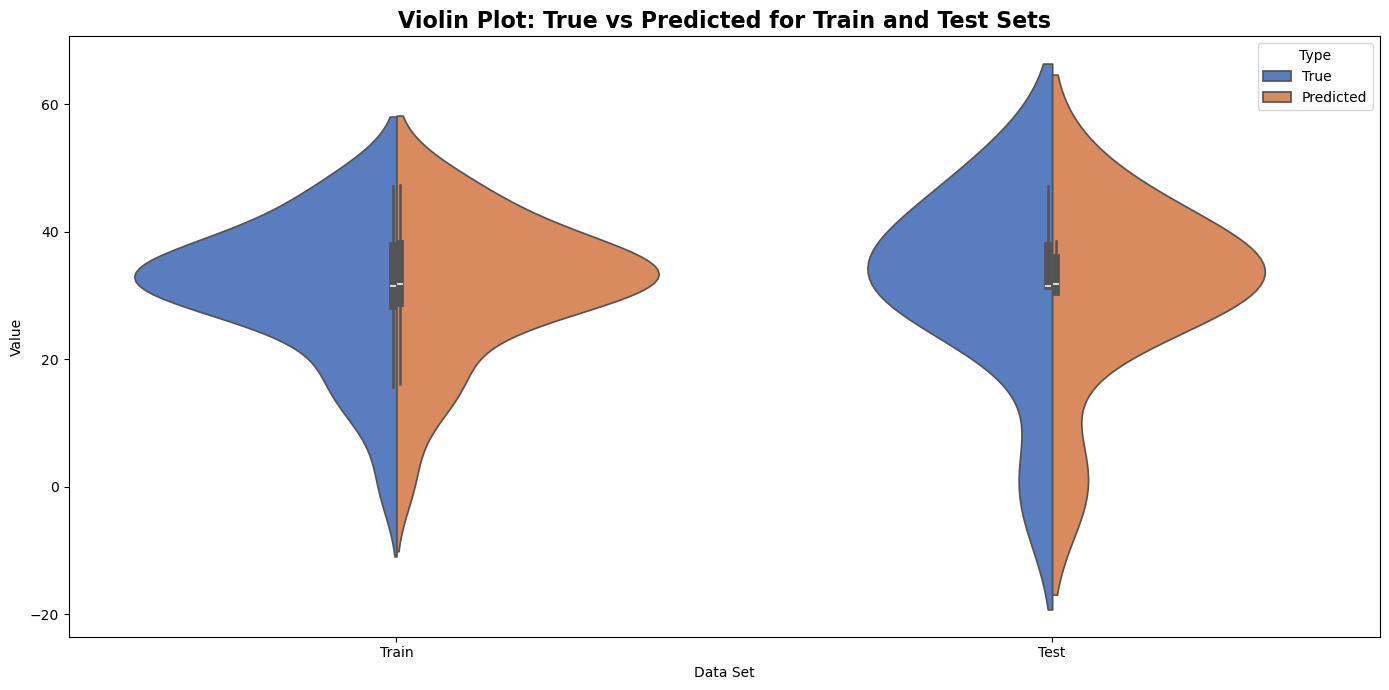

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_violin_comparison(y_train, y_train_pred, y_test, y_test_pred):
    
    
    # 确保数据为一维数组
    y_train = y_train.flatten() if hasattr(y_train, 'flatten') else y_train
    y_train_pred = y_train_pred.flatten() if hasattr(y_train_pred, 'flatten') else y_train_pred
    y_test = y_test.flatten() if hasattr(y_test, 'flatten') else y_test
    y_test_pred = y_test_pred.flatten() if hasattr(y_test_pred, 'flatten') else y_test_pred
    
    # 重新组织数据，合并训练集和测试集
    train_data = pd.DataFrame({
        'True': y_train,
        'Predicted': y_train_pred,
        'Data Set': ['Train'] * len(y_train)  # 标记为训练集
    })
    test_data = pd.DataFrame({
        'True': y_test,
        'Predicted': y_test_pred,
        'Data Set': ['Test'] * len(y_test)  # 标记为测试集
    })
    
    # 合并训练集和测试集数据
    data = pd.concat([train_data, test_data], ignore_index=True)

    # 将数据转换为适合绘制小提琴图的长格式
    data_melted = data.melt(id_vars='Data Set', value_vars=['True', 'Predicted'], var_name='Type', value_name='Value')

    # 创建小提琴图
    plt.figure(figsize=(14, 7))
    sns.violinplot(x='Data Set', y='Value', hue='Type', data=data_melted, palette='muted', split=True)

    # 添加标题
    plt.title('Violin Plot: True vs Predicted for Train and Test Sets', fontsize=16, fontweight='bold')

    # 显示图形
    plt.tight_layout()
    plt.show()
y_train_pred = stacking_model.predict(X_train) 
y_test_pred = stacking_model.predict(X_test) 
# 调用函数绘制训练集和测试集的真实值与预测值对比的小提琴图
plot_violin_comparison(y_train, y_train_pred, y_test, y_test_pred)

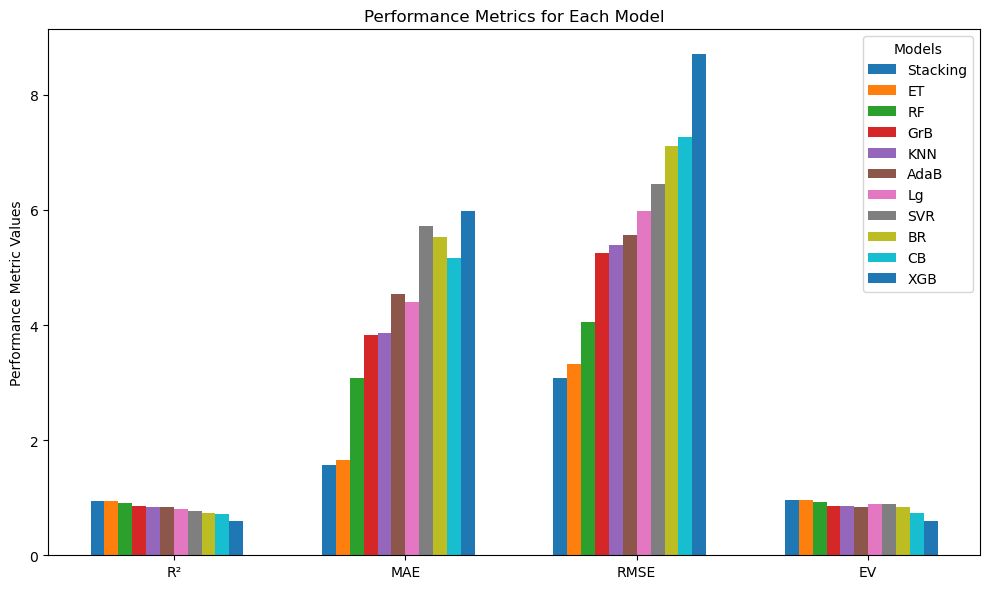

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 确保模型名称是字符串
models = results_df['Model'].astype(str)

# 确保数据是数值型（float）
metrics = results_df.columns[1:]  # 排除'Model'列，选取指标列
values = results_df[metrics].astype(float)

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.06  # 每个柱子的宽度
x = np.arange(len(metrics))  # 评价指标的位置

# 绘制每个模型的柱状图
for i, model in enumerate(models):
    ax.bar(x + (i - len(models) / 2) * width, values.iloc[i, :], width=width, label=model)

# 设置x轴刻度和标签
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=0)  # 旋转45度避免重叠

# 设置坐标轴标签和标题
ax.set_ylabel('Performance Metric Values')
ax.set_title('Performance Metrics for Each Model')

# 图例
ax.legend(title='Models')

# 保存为PDF
plt.savefig("1.pdf", format='pdf', bbox_inches='tight', dpi=1200)

# 显示图形
plt.tight_layout()
plt.show()


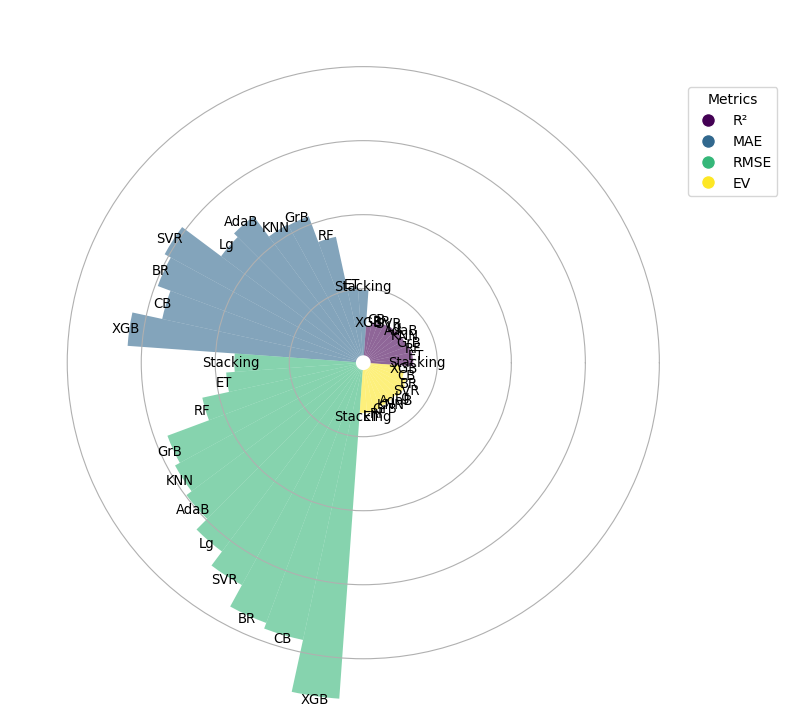

In [36]:
from matplotlib.lines import Line2D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

def plot_radar_bars(data, num_metrics, num_models):
    # 确保模型和指标的顺序是正确的
    models = data['Model'].astype(str).tolist()  # 强制转换为字符串
    metrics = data.columns[1:].tolist()  # 排除 'Model' 列

    # 确保传入的指标和模型数目正确
    assert len(metrics) == num_metrics, f"Expected {num_metrics} metrics, but got {len(metrics)}"
    assert len(models) == num_models, f"Expected {num_models} models, but got {len(models)}"

    # 设置极坐标图
    angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
    angles += angles[:1]  # 闭合图形

    # 设置颜色映射
    color_map = cm.viridis(np.linspace(0, 1, num_metrics))

    # 设置图形
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # 中心空白圆的半径
    inner_radius = 0.2

    # 设置每个柱状图的宽度
    width = (2 * np.pi / num_metrics) / num_models

    # 循环绘制每个评价指标的柱状图
    for i, metric in enumerate(metrics):
        values = data[metric].astype(float).tolist()  # 确保值是浮点型
        angle = angles[i]

        for j, value in enumerate(values):
            angle_offset = angle + j * width

            # 绘制柱状图
            ax.bar(angle_offset, value + inner_radius, bottom=inner_radius, width=width, label=models[j] if i == 0 else "",
                   alpha=0.6, color=color_map[i])

            # 标注模型名称（强制转为字符串）
            x_label = angle_offset
            y_label = value + inner_radius + 0.3
            ax.text(x_label, y_label, str(models[j]),  # 转为字符串
                    ha='center', va='center', fontsize=9.5, rotation=0)

    # 设置雷达图的属性
    ax.set_yticklabels([])
    ax.set_xticks([])

    # 自定义图例
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10, label=str(metrics[i]))
        for i in range(num_metrics)
    ]
    ax.legend(handles=legend_elements, title='Metrics', bbox_to_anchor=(0.95, 0.9), loc='upper left')
    ax.spines['polar'].set_visible(False)

    # 保存图形
    plt.savefig("2.pdf", format='pdf', bbox_inches='tight', dpi=1200)
    plt.tight_layout()
    plt.show()

# 调用函数：例如5个指标和6个模型
plot_radar_bars(results_df, 4, results_df.shape[0])


Mean Squared Error: 10.985566320000128
Mean Absolute Error: 1.648500000000019
R^2 Score: 0.9488789023843683


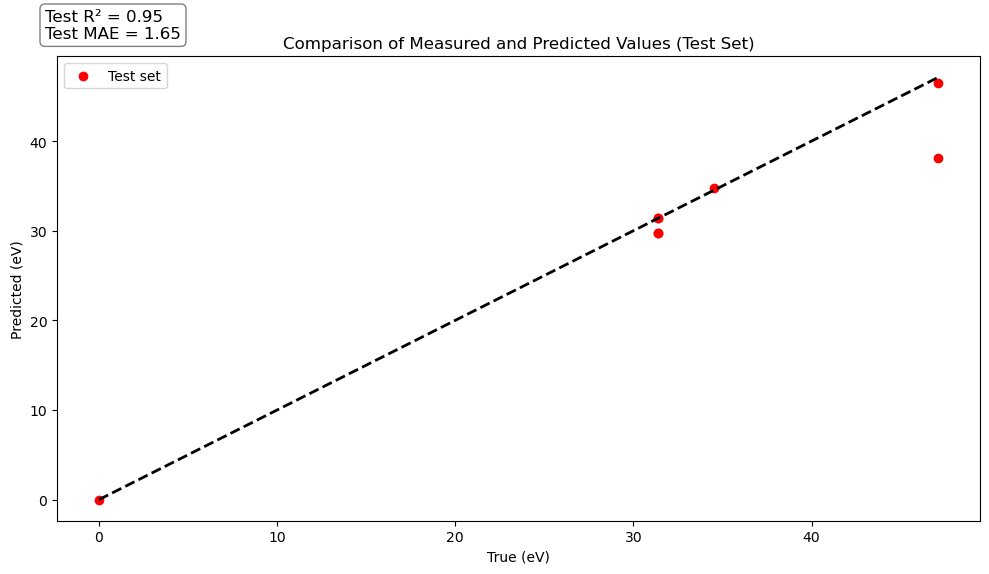

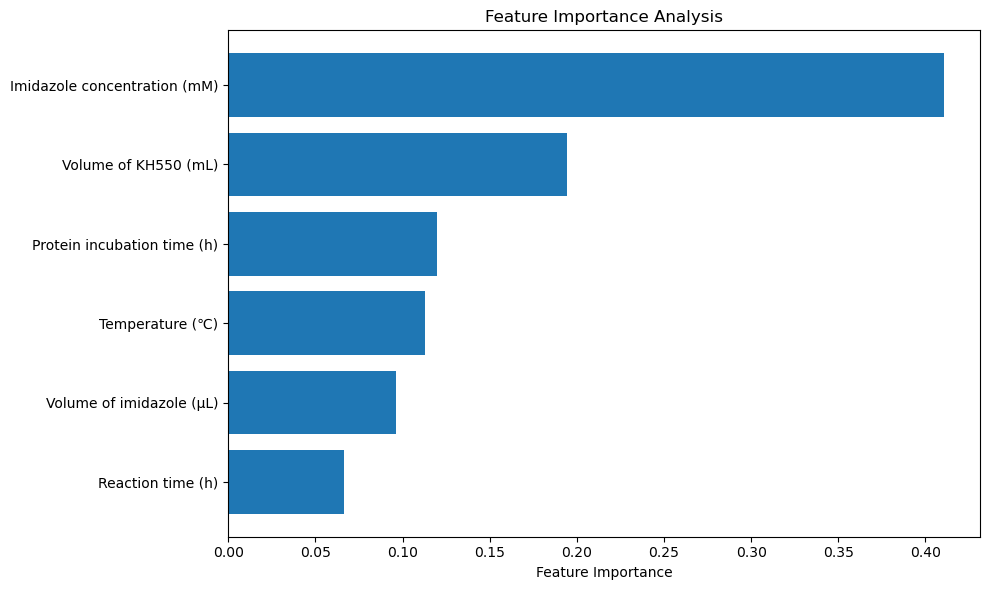

  0%|          | 0/8 [00:00<?, ?it/s]

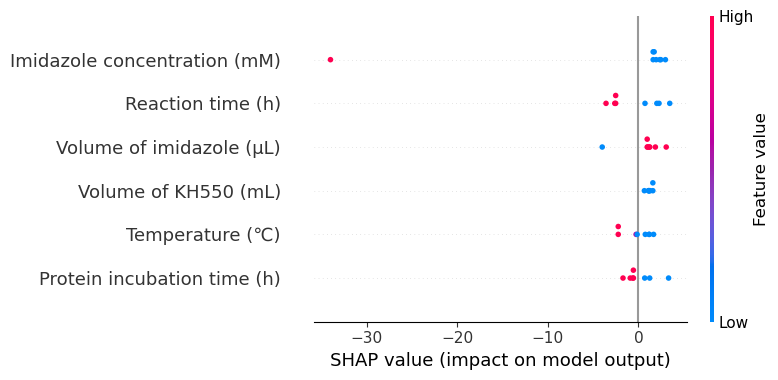

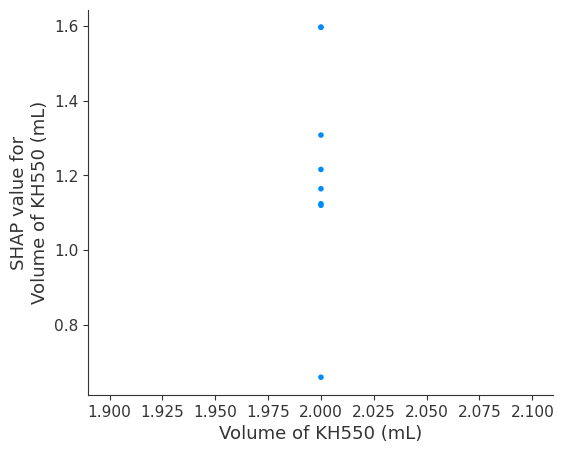

In [37]:
import shap
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE, MAE, and R² Score for the test set
best_model=joblib.load(os.path.join(save_dir, 'best_model.pkl'))
y_pred_best_model = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_best_model )
mae = mean_absolute_error(y_test, y_pred_best_model)
r2_score_value = best_r2  # Assuming `best_r2` is the best R² score from earlier

# Print the metrics for the test set
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2_score_value}")

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for the test set only
ax.scatter(y_test,  y_pred_best_model, color='red', label='Test set', marker='o')

# Plotting a line for perfect predictions (diagonal line)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Labels and title
ax.set_xlabel('True (eV)')
ax.set_ylabel('Predicted (eV)')
ax.set_title('Comparison of Measured and Predicted Values (Test Set)')

# Add text box for R² and MAE
textstr = f'Test R² = {r2_score_value:.2f}\nTest MAE = {mae:.2f}'
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

# Place the text box in the upper left corner
fig.text(0.05, 0.95, textstr, ha='left', va='top', fontsize=12, bbox=props)

# Add legend
plt.legend()

# Adjust layout to make sure nothing is cropped
plt.tight_layout(rect=[0, 0, 1, 0.93])  # Adjust the plot layout
plt.show()

# Feature importance analysis
if hasattr(best_model, 'feature_importances_'):
    # Retrieve feature importances from the model
    feature_importances = best_model.feature_importances_

    # Sort the features by importance
    sorted_idx = feature_importances.argsort()

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), [X_train.columns[i] for i in sorted_idx])
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance Analysis')
    plt.tight_layout()
    plt.show()

else:
    print("The model does not support feature importance analysis.")

# SHAP Analysis using KernelExplainer
explainer = shap.KernelExplainer(best_model.predict, X_train)  # KernelExplainer works for any model
shap_values = explainer.shap_values(X_test)  # Calculate SHAP values for the test set

# SHAP summary plot for all features
shap.summary_plot(shap_values, X_test)  # Plot a summary plot for all features

# SHAP dependence plot for a specific feature (for example, the first feature in the dataset)
# You can change the feature index as needed to visualize other features.
shap.dependence_plot(0, shap_values, X_test)  # Change the index as needed to visualize other features
